In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def plot_corr(df,size=10):
    '''Plot a graphical correlation matrix for a dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Compute the correlation matrix for the received dataframe
    corr = df.corr()
    
    # Plot the correlation matrix
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    # Add the colorbar legend
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

In [5]:
step1 = pd.read_excel('DB-covid-vague1-15-03-2021-usef.xlsx')
step1["Consentement"].count()

468

In [6]:
step1

,No,Code d'utilisateur,No Groupe,Consentement,genre,age,situation_prof,niv_etude,perte_emploi,aide_fin_gouv,aide_fin_autre,aide_fin_autre_mointant,aide_fin_autre_mointant_devise,revenu,revenu_devise,lieu_res,taille,poids,IMC,changement_ponderal,prise_poids,perte_poids,1habitation_contexte,1nbr_enfant,1nbr_pers,1nbr_coloc,1nbr_amis,1situation_autre_habitation,2habitation_contexte,2nbr_enfant,2nbr_pers,2nbr_coloc,2nbr_amis,2situation_autre_habitation,2changement_habit,2suivi_med,routine_meilleure,changement_soins_t2,2type_soins_moins,2type_soins_plus,...,2eed8,2eed9,2eed10,2eed11,2eed12,2eed13,2eed14,2eed15,2eed16,2eed17,2eed18,2eed19,2respect_recommandations,2respect_lavage,2respect_distancia,2respect_masque,2respect_prot_indiv,2trav_essentiel,2travail_continuer,2teletravail,2acces_confinement,2opinion,CEeed_t2,POSeed_t2,BODeed_t2,SHAeed_t2,Bdedi_t2,Dtedi_t2,Buedi_t2,Inedi_t2,Idedi_t2,Iaedi_t2,UPEies_t,EPRies_t2,HSCies_t2,BCCies_t2,TOTies_t2,RESedeq_t2,Ecedeq_t2,OSA_t2.1
0,1,3387819,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3387834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3387859,NaN,1.0,2.0,42.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,1.0,170,51.0,17.647059,3.0,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,2.0,3.0,1.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3387861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3387863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2986,2987,3599981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987,2988,3601069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2988,2989,3601323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2989,2990,3601340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
List_of_non_important_rows = []
for i in range(2991):
  if step1["Consentement"][i]!=1:
    List_of_non_important_rows.append(i)
List_of_important_rows = []
for i in range(2991):
  if step1["Consentement"][i]==1:
    List_of_important_rows.append(i)

In [8]:
step2 = step1.drop(List_of_non_important_rows)
step2



,No,Code d'utilisateur,No Groupe,Consentement,genre,age,situation_prof,niv_etude,perte_emploi,aide_fin_gouv,aide_fin_autre,aide_fin_autre_mointant,aide_fin_autre_mointant_devise,revenu,revenu_devise,lieu_res,taille,poids,IMC,changement_ponderal,prise_poids,perte_poids,1habitation_contexte,1nbr_enfant,1nbr_pers,1nbr_coloc,1nbr_amis,1situation_autre_habitation,2habitation_contexte,2nbr_enfant,2nbr_pers,2nbr_coloc,2nbr_amis,2situation_autre_habitation,2changement_habit,2suivi_med,routine_meilleure,changement_soins_t2,2type_soins_moins,2type_soins_plus,...,2eed8,2eed9,2eed10,2eed11,2eed12,2eed13,2eed14,2eed15,2eed16,2eed17,2eed18,2eed19,2respect_recommandations,2respect_lavage,2respect_distancia,2respect_masque,2respect_prot_indiv,2trav_essentiel,2travail_continuer,2teletravail,2acces_confinement,2opinion,CEeed_t2,POSeed_t2,BODeed_t2,SHAeed_t2,Bdedi_t2,Dtedi_t2,Buedi_t2,Inedi_t2,Idedi_t2,Iaedi_t2,UPEies_t,EPRies_t2,HSCies_t2,BCCies_t2,TOTies_t2,RESedeq_t2,Ecedeq_t2,OSA_t2.1
0,1,3387819,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3387859,NaN,1.0,2.0,42.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,1.0,170,51.0,17.647059,3.0,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,2.0,3.0,1.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,3387866,NaN,1.0,2.0,30.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,1.0,165,59.0,21.671258,1.0,1.0,NaN,3.0,,NaN,NaN,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,2.0,3.0,1.0,1.0,"Entra√Ænement, lavage de cheveux, maquillage, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,3387868,1.0,1.0,2.0,22.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,176,77.0,24.857955,1.0,1.0,NaN,3.0,,NaN,NaN,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,2.0,3.0,2.0,1.0,Moins de temps √† m‚Äôentra√Æner = une activit...,NaN,...,1.0,0.0,0.0,2.0,0.0,0.0,5.0,4.0,2.0,4.0,4.0,4.0,1.0,10.0,9.0,5.0,10.0,1.0,1.0,2.0,2,1.0,NaN,4.00,3.75,0.00,4.0,1.0,1.0,1.0,3.0,1.0,4.83,4.63,3.17,3.67,4.17,0.4,0.2,2.75875
7,8,3387878,1.0,1.0,2.0,24.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,1.0,165,68.0,24.977043,3.0,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,2.0,3.0,1.0,3.0,NaN,NaN,...,0.0,0.0,0.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,4.0,2.0,10.0,8.0,3.0,10.0,1.0,1.0,2.0,1,1.0,NaN,4.00,5.00,1.67,2.0,2.0,0.0,2.0,1.0,2.0,4.33,3.63,4.17,4.00,4.00,0.6,0.2,2.86625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,2454,3483398,NaN,1.0,1.0,30.0,6.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,2.0,3.0,170,48.0,16.608997,1.0,4.0,NaN,5.0,,2,NaN,NaN,NaN,10.0,,NaN,NaN,NaN,Clinique de soin contre les TCA,1.0,3.0,2.0,2.0,NaN,"Tout type, gu√©rison de mon anorexie boulimie.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2456,2457,3483412,2.0,1.0,NaN,24.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,163,53.0,19.948060,2.0,NaN,1.0,3.0,,NaN,NaN,NaN,NaN,3.0,,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,"maquillage, coiffure, habits",NaN,...,4.0,1.0,3.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,2.0,7.0,6.0,6.0,3.0,2.0,1.0,1.0,1,1.0,2.38,2.67,2.50,3.00,5.0,5.0,0.0,5.0,6.0,7.0,2.00,2.38,3.00,5.00,2.78,1.6,1.0,3.09500
2784,2785,3486368,NaN,1.0,2.0,14.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,152,65.0,28.133657,1.0,2.0,NaN,5.0,,3,NaN,NaN,NaN,5.0,,3,NaN,NaN,NaN,2

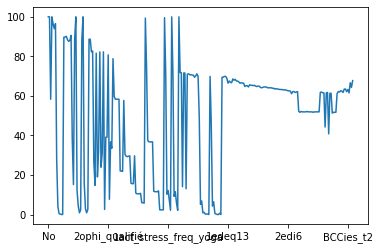

In [9]:
missing_step2=(step2.count()/468)*100
missing_step2.plot()

In [10]:
step3=step2.interpolate()

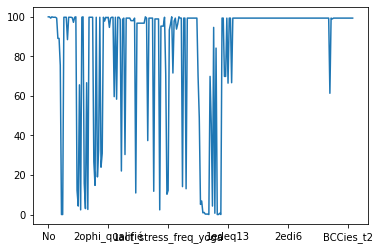

In [11]:
missing_step3=(step3.count()/468)*100
missing_step3.plot()

In [12]:
df = step3.replace(np.nan, step3.mean())
df

,No,Code d'utilisateur,No Groupe,Consentement,genre,age,situation_prof,niv_etude,perte_emploi,aide_fin_gouv,aide_fin_autre,aide_fin_autre_mointant,aide_fin_autre_mointant_devise,revenu,revenu_devise,lieu_res,taille,poids,IMC,changement_ponderal,prise_poids,perte_poids,1habitation_contexte,1nbr_enfant,1nbr_pers,1nbr_coloc,1nbr_amis,1situation_autre_habitation,2habitation_contexte,2nbr_enfant,2nbr_pers,2nbr_coloc,2nbr_amis,2situation_autre_habitation,2changement_habit,2suivi_med,routine_meilleure,changement_soins_t2,2type_soins_moins,2type_soins_plus,...,2eed8,2eed9,2eed10,2eed11,2eed12,2eed13,2eed14,2eed15,2eed16,2eed17,2eed18,2eed19,2respect_recommandations,2respect_lavage,2respect_distancia,2respect_masque,2respect_prot_indiv,2trav_essentiel,2travail_continuer,2teletravail,2acces_confinement,2opinion,CEeed_t2,POSeed_t2,BODeed_t2,SHAeed_t2,Bdedi_t2,Dtedi_t2,Buedi_t2,Inedi_t2,Idedi_t2,Iaedi_t2,UPEies_t,EPRies_t2,HSCies_t2,BCCies_t2,TOTies_t2,RESedeq_t2,Ecedeq_t2,OSA_t2.1
0,1,3387819,1.858065,1.0,1.907923,35.631692,3.295503,3.426882,1.834532,4.0,2.0,NaN,NaN,2.976445,1.142398,1.231263,NaN,78.549251,28.328863,2.084582,1.899142,2.012088,3.360814,,NaN,NaN,1.091205,NaN,3.496788,,NaN,NaN,2.378205,NaN,1.857602,2.880086,1.389722,2.105996,NaN,NaN,...,2.18172,0.424731,1.13871,2.237634,1.934409,1.365591,3.647312,3.883871,3.427957,3.652688,3.869892,3.07957,1.607527,8.445161,7.783871,6.141935,9.383871,1.675269,1.333333,1.269892,NaN,1.895699,1.603596,3.335667,3.651075,2.294925,6.383871,4.873118,2.322581,4.445161,3.726882,4.012903,3.297989,3.219333,3.052613,3.852065,3.274968,1.476559,1.20,2.828326
2,3,3387859,1.858065,1.0,2.000000,42.000000,1.000000,3.426882,1.834532,4.0,2.0,NaN,NaN,6.000000,1.000000,1.000000,170,51.000000,17.647059,3.000000,1.899142,2.012088,3.000000,,NaN,NaN,1.091205,NaN,3.000000,,NaN,NaN,2.378205,NaN,2.000000,3.000000,1.000000,3.000000,NaN,NaN,...,2.18172,0.424731,1.13871,2.237634,1.934409,1.365591,3.647312,3.883871,3.427957,3.652688,3.869892,3.07957,1.607527,8.445161,7.783871,6.141935,9.383871,1.675269,1.333333,1.269892,NaN,1.895699,1.603596,3.335667,3.651075,2.294925,6.383871,4.873118,2.322581,4.445161,3.726882,4.012903,3.297989,3.219333,3.052613,3.852065,3.274968,1.476559,1.20,2.828326
5,6,3387866,1.858065,1.0,2.000000,30.000000,3.000000,3.426882,1.834532,4.0,2.0,NaN,NaN,4.000000,1.000000,1.000000,165,59.000000,21.671258,1.000000,1.000000,2.012088,3.000000,,NaN,NaN,1.091205,NaN,3.000000,,NaN,NaN,2.378205,NaN,2.000000,3.000000,1.000000,1.000000,"Entra√Ænement, lavage de cheveux, maquillage, ...",NaN,...,2.18172,0.424731,1.13871,2.237634,1.934409,1.365591,3.647312,3.883871,3.427957,3.652688,3.869892,3.07957,1.607527,8.445161,7.783871,6.141935,9.383871,1.675269,1.333333,1.269892,NaN,1.895699,1.603596,3.335667,3.651075,2.294925,6.383871,4.873118,2.322581,4.445161,3.726882,4.012903,3.297989,3.219333,3.052613,3.852065,3.274968,1.476559,1.20,2.828326
6,7,3387868,1.000000,1.0,2.000000,22.000000,4.000000,4.000000,1.834532,4.0,2.0,NaN,NaN,1.000000,1.000000,1.000000,176,77.000000,24.857955,1.000000,1.000000,2.012088,3.000000,,NaN,NaN,1.091205,NaN,3.000000,,NaN,NaN,2.378205,NaN,2.000000,3.000000,2.000000,1.000000,Moins de temps √† m‚Äôentra√Æner = une activit...,NaN,...,1.00000,0.000000,0.00000,2.000000,0.000000,0.000000,5.000000,4.000000,2.000000,4.000000,4.000000,4.00000,1.000000,10.000000,9.000000,5.000000,10.000000,1.000000,1.000000,2.000000,2,1.000000,1.603596,4.000000,3.750000,0.000000,4.000000,1.000000,1.000000,1.000000,3.000000,1.000000,4.830000,4.630000,3.170000,3.670000,4.170000,0.400000,0.20,2.758750
7,8,3387878,1.000000,1.0,2.000000,24.000000,3.000000,3.666667,1.834532,4.0,2.0,NaN,NaN,4.000000,1.000000,1.000000,165,68.000000,24.977043,3.000000,1.083333,2.012088,1.000000,,NaN,NaN,1.091205,NaN,1.000000,,NaN,NaN,2.378205,NaN,2.000000,3.000000,1.000000,3.000000,NaN,NaN,...,0.00000,0.000000,0.00000,2.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.00000,2.000000,10.000000,8.000000,3.000000,10.000000,1.

*Choosing* important columns

In [13]:
df_7=step3[['RESedeq_t2', 'Buedi_t2','Bdedi_t2','BCCies_t2','EPRies_t2','HSCies_t2','UPEies_t']]
df_7

,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.4,1.0,4.00,3.67,4.6300,3.170,4.8300
7,0.6,0.0,2.00,4.00,3.6300,4.170,4.3300
...,...,...,...,...,...,...,...
2453,1.2,0.5,5.25,5.00,2.8175,3.400,2.7075
2456,1.6,0.0,5.00,5.00,2.3800,3.000,2.0000
2784,0.8,0.5,3.50,5.00,3.3150,3.665,2.5850
2785,0.0,1.0,2.00,5.00,4.2500,4.330,3.1700


In [14]:
df_20=step3[['RESedeq_t2', 'Buedi_t2','Bdedi_t2','BCCies_t2','EPRies_t2','HSCies_t2','UPEies_t', 'Dtedi_t2', '2edeq13', '2edeq16', 'CEeed_t2', 'POSeed_t2', 'SHAeed_t2', 'BODeed_t2', 'Iaedi_t2', 'Idedi_t2','Inedi_t2','2edeq17', 'restriction_aliment_t2', 'restriction_substance_t2' ]]
df_20

,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t,Dtedi_t2,2edeq13,2edeq16,CEeed_t2,POSeed_t2,SHAeed_t2,BODeed_t2,Iaedi_t2,Idedi_t2,Inedi_t2,2edeq17,restriction_aliment_t2,restriction_substance_t2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.4,1.0,4.00,3.67,4.6300,3.170,4.8300,1.00,0.0,0.0,NaN,4.000,0.0000,3.7500,1.00,3.00,1.0,0.0,2.0,2.0
7,0.6,0.0,2.00,4.00,3.6300,4.170,4.3300,2.00,0.0,0.0,NaN,4.000,1.6700,5.0000,2.00,1.00,2.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,1.2,0.5,5.25,5.00,2.8175,3.400,2.7075,3.75,0.0,0.0,1.8175,3.085,2.4175,2.8125,5.25,4.75,4.5,0.0,2.0,2.0
2456,1.6,0.0,5.00,5.00,2.3800,3.000,2.0000,5.00,0.0,0.0,2.3800,2.670,3.0000,2.5000,7.00,6.00,5.0,0.0,2.0,2.0
2784,0.8,0.5,3.50,5.00,3.3150,3.665,2.5850,3.50,0.0,0.0,2.3150,3.670,2.0000,3.7500,5.00,3.00,3.0,0.0,2.0,2.0
2785,0.0,1.0,2.00,5.00,4.2500,4.330,3.1700,2.00,0.0,0.0,2.2500,4.670,1.0000,5.0000,3.00,0.00,1.0,0.0,2.0,2.0


In [15]:
df_newindexed=pd.DataFrame.from_records(df)
df_newindexed

,No,Code d'utilisateur,No Groupe,Consentement,genre,age,situation_prof,niv_etude,perte_emploi,aide_fin_gouv,aide_fin_autre,aide_fin_autre_mointant,aide_fin_autre_mointant_devise,revenu,revenu_devise,lieu_res,taille,poids,IMC,changement_ponderal,prise_poids,perte_poids,1habitation_contexte,1nbr_enfant,1nbr_pers,1nbr_coloc,1nbr_amis,1situation_autre_habitation,2habitation_contexte,2nbr_enfant,2nbr_pers,2nbr_coloc,2nbr_amis,2situation_autre_habitation,2changement_habit,2suivi_med,routine_meilleure,changement_soins_t2,2type_soins_moins,2type_soins_plus,...,2eed8,2eed9,2eed10,2eed11,2eed12,2eed13,2eed14,2eed15,2eed16,2eed17,2eed18,2eed19,2respect_recommandations,2respect_lavage,2respect_distancia,2respect_masque,2respect_prot_indiv,2trav_essentiel,2travail_continuer,2teletravail,2acces_confinement,2opinion,CEeed_t2,POSeed_t2,BODeed_t2,SHAeed_t2,Bdedi_t2,Dtedi_t2,Buedi_t2,Inedi_t2,Idedi_t2,Iaedi_t2,UPEies_t,EPRies_t2,HSCies_t2,BCCies_t2,TOTies_t2,RESedeq_t2,Ecedeq_t2,OSA_t2.1
0,1,3387819,1.858065,1.0,1.907923,35.631692,3.295503,3.426882,1.834532,4.0,2.0,NaN,NaN,2.976445,1.142398,1.231263,NaN,78.549251,28.328863,2.084582,1.899142,2.012088,3.360814,,NaN,NaN,1.091205,NaN,3.496788,,NaN,NaN,2.378205,NaN,1.857602,2.880086,1.389722,2.105996,NaN,NaN,...,2.18172,0.424731,1.13871,2.237634,1.934409,1.365591,3.647312,3.883871,3.427957,3.652688,3.869892,3.07957,1.607527,8.445161,7.783871,6.141935,9.383871,1.675269,1.333333,1.269892,NaN,1.895699,1.603596,3.335667,3.651075,2.294925,6.383871,4.873118,2.322581,4.445161,3.726882,4.012903,3.297989,3.219333,3.052613,3.852065,3.274968,1.476559,1.20,2.828326
1,3,3387859,1.858065,1.0,2.000000,42.000000,1.000000,3.426882,1.834532,4.0,2.0,NaN,NaN,6.000000,1.000000,1.000000,170,51.000000,17.647059,3.000000,1.899142,2.012088,3.000000,,NaN,NaN,1.091205,NaN,3.000000,,NaN,NaN,2.378205,NaN,2.000000,3.000000,1.000000,3.000000,NaN,NaN,...,2.18172,0.424731,1.13871,2.237634,1.934409,1.365591,3.647312,3.883871,3.427957,3.652688,3.869892,3.07957,1.607527,8.445161,7.783871,6.141935,9.383871,1.675269,1.333333,1.269892,NaN,1.895699,1.603596,3.335667,3.651075,2.294925,6.383871,4.873118,2.322581,4.445161,3.726882,4.012903,3.297989,3.219333,3.052613,3.852065,3.274968,1.476559,1.20,2.828326
2,6,3387866,1.858065,1.0,2.000000,30.000000,3.000000,3.426882,1.834532,4.0,2.0,NaN,NaN,4.000000,1.000000,1.000000,165,59.000000,21.671258,1.000000,1.000000,2.012088,3.000000,,NaN,NaN,1.091205,NaN,3.000000,,NaN,NaN,2.378205,NaN,2.000000,3.000000,1.000000,1.000000,"Entra√Ænement, lavage de cheveux, maquillage, ...",NaN,...,2.18172,0.424731,1.13871,2.237634,1.934409,1.365591,3.647312,3.883871,3.427957,3.652688,3.869892,3.07957,1.607527,8.445161,7.783871,6.141935,9.383871,1.675269,1.333333,1.269892,NaN,1.895699,1.603596,3.335667,3.651075,2.294925,6.383871,4.873118,2.322581,4.445161,3.726882,4.012903,3.297989,3.219333,3.052613,3.852065,3.274968,1.476559,1.20,2.828326
3,7,3387868,1.000000,1.0,2.000000,22.000000,4.000000,4.000000,1.834532,4.0,2.0,NaN,NaN,1.000000,1.000000,1.000000,176,77.000000,24.857955,1.000000,1.000000,2.012088,3.000000,,NaN,NaN,1.091205,NaN,3.000000,,NaN,NaN,2.378205,NaN,2.000000,3.000000,2.000000,1.000000,Moins de temps √† m‚Äôentra√Æner = une activit...,NaN,...,1.00000,0.000000,0.00000,2.000000,0.000000,0.000000,5.000000,4.000000,2.000000,4.000000,4.000000,4.00000,1.000000,10.000000,9.000000,5.000000,10.000000,1.000000,1.000000,2.000000,2,1.000000,1.603596,4.000000,3.750000,0.000000,4.000000,1.000000,1.000000,1.000000,3.000000,1.000000,4.830000,4.630000,3.170000,3.670000,4.170000,0.400000,0.20,2.758750
4,8,3387878,1.000000,1.0,2.000000,24.000000,3.000000,3.666667,1.834532,4.0,2.0,NaN,NaN,4.000000,1.000000,1.000000,165,68.000000,24.977043,3.000000,1.083333,2.012088,1.000000,,NaN,NaN,1.091205,NaN,1.000000,,NaN,NaN,2.378205,NaN,2.000000,3.000000,1.000000,3.000000,NaN,NaN,...,0.00000,0.000000,0.00000,2.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.00000,2.000000,10.000000,8.000000,3.000000,10.000000,1.

In [16]:
df_7_newindexed=pd.DataFrame.from_records(df_7)
df_7_newindexed

,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.4,1.0,4.00,3.67,4.6300,3.170,4.8300
4,0.6,0.0,2.00,4.00,3.6300,4.170,4.3300
...,...,...,...,...,...,...,...
463,1.2,0.5,5.25,5.00,2.8175,3.400,2.7075
464,1.6,0.0,5.00,5.00,2.3800,3.000,2.0000
465,0.8,0.5,3.50,5.00,3.3150,3.665,2.5850
466,0.0,1.0,2.00,5.00,4.2500,4.330,3.1700


In [17]:
df_20_newindexed=pd.DataFrame.from_records(df_20)
df_20_newindexed

,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t,Dtedi_t2,2edeq13,2edeq16,CEeed_t2,POSeed_t2,SHAeed_t2,BODeed_t2,Iaedi_t2,Idedi_t2,Inedi_t2,2edeq17,restriction_aliment_t2,restriction_substance_t2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.4,1.0,4.00,3.67,4.6300,3.170,4.8300,1.00,0.0,0.0,NaN,4.000,0.0000,3.7500,1.00,3.00,1.0,0.0,2.0,2.0
4,0.6,0.0,2.00,4.00,3.6300,4.170,4.3300,2.00,0.0,0.0,NaN,4.000,1.6700,5.0000,2.00,1.00,2.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,1.2,0.5,5.25,5.00,2.8175,3.400,2.7075,3.75,0.0,0.0,1.8175,3.085,2.4175,2.8125,5.25,4.75,4.5,0.0,2.0,2.0
464,1.6,0.0,5.00,5.00,2.3800,3.000,2.0000,5.00,0.0,0.0,2.3800,2.670,3.0000,2.5000,7.00,6.00,5.0,0.0,2.0,2.0
465,0.8,0.5,3.50,5.00,3.3150,3.665,2.5850,3.50,0.0,0.0,2.3150,3.670,2.0000,3.7500,5.00,3.00,3.0,0.0,2.0,2.0
466,0.0,1.0,2.00,5.00,4.2500,4.330,3.1700,2.00,0.0,0.0,2.2500,4.670,1.0000,5.0000,3.00,0.00,1.0,0.0,2.0,2.0


In [18]:
df_255 = df_newindexed.replace(np.nan, df_newindexed.mean())
df_255

,No,Code d'utilisateur,No Groupe,Consentement,genre,age,situation_prof,niv_etude,perte_emploi,aide_fin_gouv,aide_fin_autre,aide_fin_autre_mointant,aide_fin_autre_mointant_devise,revenu,revenu_devise,lieu_res,taille,poids,IMC,changement_ponderal,prise_poids,perte_poids,1habitation_contexte,1nbr_enfant,1nbr_pers,1nbr_coloc,1nbr_amis,1situation_autre_habitation,2habitation_contexte,2nbr_enfant,2nbr_pers,2nbr_coloc,2nbr_amis,2situation_autre_habitation,2changement_habit,2suivi_med,routine_meilleure,changement_soins_t2,2type_soins_moins,2type_soins_plus,...,2eed8,2eed9,2eed10,2eed11,2eed12,2eed13,2eed14,2eed15,2eed16,2eed17,2eed18,2eed19,2respect_recommandations,2respect_lavage,2respect_distancia,2respect_masque,2respect_prot_indiv,2trav_essentiel,2travail_continuer,2teletravail,2acces_confinement,2opinion,CEeed_t2,POSeed_t2,BODeed_t2,SHAeed_t2,Bdedi_t2,Dtedi_t2,Buedi_t2,Inedi_t2,Idedi_t2,Iaedi_t2,UPEies_t,EPRies_t2,HSCies_t2,BCCies_t2,TOTies_t2,RESedeq_t2,Ecedeq_t2,OSA_t2.1
0,1,3387819,1.858065,1.0,1.907923,35.631692,3.295503,3.426882,1.834532,4.0,2.0,NaN,NaN,2.976445,1.142398,1.231263,NaN,78.549251,28.328863,2.084582,1.899142,2.012088,3.360814,,NaN,NaN,1.091205,NaN,3.496788,,NaN,NaN,2.378205,NaN,1.857602,2.880086,1.389722,2.105996,NaN,NaN,...,2.18172,0.424731,1.13871,2.237634,1.934409,1.365591,3.647312,3.883871,3.427957,3.652688,3.869892,3.07957,1.607527,8.445161,7.783871,6.141935,9.383871,1.675269,1.333333,1.269892,NaN,1.895699,1.603596,3.335667,3.651075,2.294925,6.383871,4.873118,2.322581,4.445161,3.726882,4.012903,3.297989,3.219333,3.052613,3.852065,3.274968,1.476559,1.20,2.828326
1,3,3387859,1.858065,1.0,2.000000,42.000000,1.000000,3.426882,1.834532,4.0,2.0,NaN,NaN,6.000000,1.000000,1.000000,170,51.000000,17.647059,3.000000,1.899142,2.012088,3.000000,,NaN,NaN,1.091205,NaN,3.000000,,NaN,NaN,2.378205,NaN,2.000000,3.000000,1.000000,3.000000,NaN,NaN,...,2.18172,0.424731,1.13871,2.237634,1.934409,1.365591,3.647312,3.883871,3.427957,3.652688,3.869892,3.07957,1.607527,8.445161,7.783871,6.141935,9.383871,1.675269,1.333333,1.269892,NaN,1.895699,1.603596,3.335667,3.651075,2.294925,6.383871,4.873118,2.322581,4.445161,3.726882,4.012903,3.297989,3.219333,3.052613,3.852065,3.274968,1.476559,1.20,2.828326
2,6,3387866,1.858065,1.0,2.000000,30.000000,3.000000,3.426882,1.834532,4.0,2.0,NaN,NaN,4.000000,1.000000,1.000000,165,59.000000,21.671258,1.000000,1.000000,2.012088,3.000000,,NaN,NaN,1.091205,NaN,3.000000,,NaN,NaN,2.378205,NaN,2.000000,3.000000,1.000000,1.000000,"Entra√Ænement, lavage de cheveux, maquillage, ...",NaN,...,2.18172,0.424731,1.13871,2.237634,1.934409,1.365591,3.647312,3.883871,3.427957,3.652688,3.869892,3.07957,1.607527,8.445161,7.783871,6.141935,9.383871,1.675269,1.333333,1.269892,NaN,1.895699,1.603596,3.335667,3.651075,2.294925,6.383871,4.873118,2.322581,4.445161,3.726882,4.012903,3.297989,3.219333,3.052613,3.852065,3.274968,1.476559,1.20,2.828326
3,7,3387868,1.000000,1.0,2.000000,22.000000,4.000000,4.000000,1.834532,4.0,2.0,NaN,NaN,1.000000,1.000000,1.000000,176,77.000000,24.857955,1.000000,1.000000,2.012088,3.000000,,NaN,NaN,1.091205,NaN,3.000000,,NaN,NaN,2.378205,NaN,2.000000,3.000000,2.000000,1.000000,Moins de temps √† m‚Äôentra√Æner = une activit...,NaN,...,1.00000,0.000000,0.00000,2.000000,0.000000,0.000000,5.000000,4.000000,2.000000,4.000000,4.000000,4.00000,1.000000,10.000000,9.000000,5.000000,10.000000,1.000000,1.000000,2.000000,2,1.000000,1.603596,4.000000,3.750000,0.000000,4.000000,1.000000,1.000000,1.000000,3.000000,1.000000,4.830000,4.630000,3.170000,3.670000,4.170000,0.400000,0.20,2.758750
4,8,3387878,1.000000,1.0,2.000000,24.000000,3.000000,3.666667,1.834532,4.0,2.0,NaN,NaN,4.000000,1.000000,1.000000,165,68.000000,24.977043,3.000000,1.083333,2.012088,1.000000,,NaN,NaN,1.091205,NaN,1.000000,,NaN,NaN,2.378205,NaN,2.000000,3.000000,1.000000,3.000000,NaN,NaN,...,0.00000,0.000000,0.00000,2.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.00000,2.000000,10.000000,8.000000,3.000000,10.000000,1.

In [19]:
df7 = df_7_newindexed.replace(np.nan, df_7_newindexed.mean())
df7

,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t
0,1.476559,2.322581,6.383871,3.852065,3.219333,3.052613,3.297989
1,1.476559,2.322581,6.383871,3.852065,3.219333,3.052613,3.297989
2,1.476559,2.322581,6.383871,3.852065,3.219333,3.052613,3.297989
3,0.400000,1.000000,4.000000,3.670000,4.630000,3.170000,4.830000
4,0.600000,0.000000,2.000000,4.000000,3.630000,4.170000,4.330000
...,...,...,...,...,...,...,...
463,1.200000,0.500000,5.250000,5.000000,2.817500,3.400000,2.707500
464,1.600000,0.000000,5.000000,5.000000,2.380000,3.000000,2.000000
465,0.800000,0.500000,3.500000,5.000000,3.315000,3.665000,2.585000
466,0.000000,1.000000,2.000000,5.000000,4.250000,4.330000,3.170000


In [20]:
df20 = df_20_newindexed.replace(np.nan, df_20_newindexed.mean())
df20

,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t,Dtedi_t2,2edeq13,2edeq16,CEeed_t2,POSeed_t2,SHAeed_t2,BODeed_t2,Iaedi_t2,Idedi_t2,Inedi_t2,2edeq17,restriction_aliment_t2,restriction_substance_t2
0,1.476559,2.322581,6.383871,3.852065,3.219333,3.052613,3.297989,4.873118,2.753763,1.273118,1.603596,3.335667,2.294925,3.651075,4.012903,3.726882,4.445161,0.43871,1.952688,1.948387
1,1.476559,2.322581,6.383871,3.852065,3.219333,3.052613,3.297989,4.873118,2.753763,1.273118,1.603596,3.335667,2.294925,3.651075,4.012903,3.726882,4.445161,0.43871,1.952688,1.948387
2,1.476559,2.322581,6.383871,3.852065,3.219333,3.052613,3.297989,4.873118,2.753763,1.273118,1.603596,3.335667,2.294925,3.651075,4.012903,3.726882,4.445161,0.43871,1.952688,1.948387
3,0.400000,1.000000,4.000000,3.670000,4.630000,3.170000,4.830000,1.000000,0.000000,0.000000,1.603596,4.000000,0.000000,3.750000,1.000000,3.000000,1.000000,0.00000,2.000000,2.000000
4,0.600000,0.000000,2.000000,4.000000,3.630000,4.170000,4.330000,2.000000,0.000000,0.000000,1.603596,4.000000,1.670000,5.000000,2.000000,1.000000,2.000000,0.00000,2.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,1.200000,0.500000,5.250000,5.000000,2.817500,3.400000,2.707500,3.750000,0.000000,0.000000,1.817500,3.085000,2.417500,2.812500,5.250000,4.750000,4.500000,0.00000,2.000000,2.000000
464,1.600000,0.000000,5.000000,5.000000,2.380000,3.000000,2.000000,5.000000,0.000000,0.000000,2.380000,2.670000,3.000000,2.500000,7.000000,6.000000,5.000000,0.00000,2.000000,2.000000
465,0.800000,0.500000,3.500000,5.000000,3.315000,3.665000,2.585000,3.500000,0.000000,0.000000,2.315000,3.670000,2.000000,3.750000,5.000000,3.000000,3.000000,0.00000,2.000000,2.000000
466,0.000000,1.000000,2.000000,5.000000,4.250000,4.330000,3.170000,2.000000,0.000000,0.000000,2.250000,4.670000,1.000000,5.000000,3.000000,0.000000,1.000000,0.00000,2.000000,2.000000


In [21]:
df255 = df_newindexed.replace(np.nan, df_newindexed.mean())
df255

,No,Code d'utilisateur,No Groupe,Consentement,genre,age,situation_prof,niv_etude,perte_emploi,aide_fin_gouv,aide_fin_autre,aide_fin_autre_mointant,aide_fin_autre_mointant_devise,revenu,revenu_devise,lieu_res,taille,poids,IMC,changement_ponderal,prise_poids,perte_poids,1habitation_contexte,1nbr_enfant,1nbr_pers,1nbr_coloc,1nbr_amis,1situation_autre_habitation,2habitation_contexte,2nbr_enfant,2nbr_pers,2nbr_coloc,2nbr_amis,2situation_autre_habitation,2changement_habit,2suivi_med,routine_meilleure,changement_soins_t2,2type_soins_moins,2type_soins_plus,...,2eed8,2eed9,2eed10,2eed11,2eed12,2eed13,2eed14,2eed15,2eed16,2eed17,2eed18,2eed19,2respect_recommandations,2respect_lavage,2respect_distancia,2respect_masque,2respect_prot_indiv,2trav_essentiel,2travail_continuer,2teletravail,2acces_confinement,2opinion,CEeed_t2,POSeed_t2,BODeed_t2,SHAeed_t2,Bdedi_t2,Dtedi_t2,Buedi_t2,Inedi_t2,Idedi_t2,Iaedi_t2,UPEies_t,EPRies_t2,HSCies_t2,BCCies_t2,TOTies_t2,RESedeq_t2,Ecedeq_t2,OSA_t2.1
0,1,3387819,1.858065,1.0,1.907923,35.631692,3.295503,3.426882,1.834532,4.0,2.0,NaN,NaN,2.976445,1.142398,1.231263,NaN,78.549251,28.328863,2.084582,1.899142,2.012088,3.360814,,NaN,NaN,1.091205,NaN,3.496788,,NaN,NaN,2.378205,NaN,1.857602,2.880086,1.389722,2.105996,NaN,NaN,...,2.18172,0.424731,1.13871,2.237634,1.934409,1.365591,3.647312,3.883871,3.427957,3.652688,3.869892,3.07957,1.607527,8.445161,7.783871,6.141935,9.383871,1.675269,1.333333,1.269892,NaN,1.895699,1.603596,3.335667,3.651075,2.294925,6.383871,4.873118,2.322581,4.445161,3.726882,4.012903,3.297989,3.219333,3.052613,3.852065,3.274968,1.476559,1.20,2.828326
1,3,3387859,1.858065,1.0,2.000000,42.000000,1.000000,3.426882,1.834532,4.0,2.0,NaN,NaN,6.000000,1.000000,1.000000,170,51.000000,17.647059,3.000000,1.899142,2.012088,3.000000,,NaN,NaN,1.091205,NaN,3.000000,,NaN,NaN,2.378205,NaN,2.000000,3.000000,1.000000,3.000000,NaN,NaN,...,2.18172,0.424731,1.13871,2.237634,1.934409,1.365591,3.647312,3.883871,3.427957,3.652688,3.869892,3.07957,1.607527,8.445161,7.783871,6.141935,9.383871,1.675269,1.333333,1.269892,NaN,1.895699,1.603596,3.335667,3.651075,2.294925,6.383871,4.873118,2.322581,4.445161,3.726882,4.012903,3.297989,3.219333,3.052613,3.852065,3.274968,1.476559,1.20,2.828326
2,6,3387866,1.858065,1.0,2.000000,30.000000,3.000000,3.426882,1.834532,4.0,2.0,NaN,NaN,4.000000,1.000000,1.000000,165,59.000000,21.671258,1.000000,1.000000,2.012088,3.000000,,NaN,NaN,1.091205,NaN,3.000000,,NaN,NaN,2.378205,NaN,2.000000,3.000000,1.000000,1.000000,"Entra√Ænement, lavage de cheveux, maquillage, ...",NaN,...,2.18172,0.424731,1.13871,2.237634,1.934409,1.365591,3.647312,3.883871,3.427957,3.652688,3.869892,3.07957,1.607527,8.445161,7.783871,6.141935,9.383871,1.675269,1.333333,1.269892,NaN,1.895699,1.603596,3.335667,3.651075,2.294925,6.383871,4.873118,2.322581,4.445161,3.726882,4.012903,3.297989,3.219333,3.052613,3.852065,3.274968,1.476559,1.20,2.828326
3,7,3387868,1.000000,1.0,2.000000,22.000000,4.000000,4.000000,1.834532,4.0,2.0,NaN,NaN,1.000000,1.000000,1.000000,176,77.000000,24.857955,1.000000,1.000000,2.012088,3.000000,,NaN,NaN,1.091205,NaN,3.000000,,NaN,NaN,2.378205,NaN,2.000000,3.000000,2.000000,1.000000,Moins de temps √† m‚Äôentra√Æner = une activit...,NaN,...,1.00000,0.000000,0.00000,2.000000,0.000000,0.000000,5.000000,4.000000,2.000000,4.000000,4.000000,4.00000,1.000000,10.000000,9.000000,5.000000,10.000000,1.000000,1.000000,2.000000,2,1.000000,1.603596,4.000000,3.750000,0.000000,4.000000,1.000000,1.000000,1.000000,3.000000,1.000000,4.830000,4.630000,3.170000,3.670000,4.170000,0.400000,0.20,2.758750
4,8,3387878,1.000000,1.0,2.000000,24.000000,3.000000,3.666667,1.834532,4.0,2.0,NaN,NaN,4.000000,1.000000,1.000000,165,68.000000,24.977043,3.000000,1.083333,2.012088,1.000000,,NaN,NaN,1.091205,NaN,1.000000,,NaN,NaN,2.378205,NaN,2.000000,3.000000,1.000000,3.000000,NaN,NaN,...,0.00000,0.000000,0.00000,2.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.00000,2.000000,10.000000,8.000000,3.000000,10.000000,1.

In [22]:
import scipy
import scipy.cluster.hierarchy as sch

In [23]:
df255.corr()


,No,Code d'utilisateur,No Groupe,Consentement,genre,age,situation_prof,niv_etude,perte_emploi,aide_fin_gouv,aide_fin_autre,aide_fin_autre_mointant,aide_fin_autre_mointant_devise,revenu,revenu_devise,lieu_res,poids,IMC,changement_ponderal,prise_poids,perte_poids,1habitation_contexte,1nbr_amis,2habitation_contexte,2nbr_amis,2changement_habit,2suivi_med,routine_meilleure,changement_soins_t2,changement_prod_t2,changement_loisir_t2,1ophi_qualifié,1ophi_dif_extrem,1ophi_quelques_dif,1ophi_rout_approp,2ophi_qualifié,2ophi_dif_extrem,2ophi_quelques_dif,2ophi_rout_approp,1act_phys1,...,2eed7,2eed8,2eed9,2eed10,2eed11,2eed12,2eed13,2eed14,2eed15,2eed16,2eed17,2eed18,2eed19,2respect_recommandations,2respect_lavage,2respect_distancia,2respect_masque,2respect_prot_indiv,2trav_essentiel,2travail_continuer,2teletravail,2opinion,CEeed_t2,POSeed_t2,BODeed_t2,SHAeed_t2,Bdedi_t2,Dtedi_t2,Buedi_t2,Inedi_t2,Idedi_t2,Iaedi_t2,UPEies_t,EPRies_t2,HSCies_t2,BCCies_t2,TOTies_t2,RESedeq_t2,Ecedeq_t2,OSA_t2.1
No,1.000000,0.887255,0.003001,NaN,-0.122556,-0.019589,0.088776,-0.367270,-0.213321,NaN,NaN,NaN,NaN,-0.119784,0.137259,0.169305,-0.025373,-0.019193,-0.073359,0.340279,-0.272653,0.049281,-0.256654,0.118843,0.329248,-0.035067,0.009571,-0.062552,0.059608,0.033525,0.052874,0.040001,0.747054,-0.045440,0.026378,-0.043802,0.052503,0.072341,-0.015367,0.034028,...,-0.000720,-0.050836,0.020810,-0.011303,-0.072900,-0.007464,0.065143,0.025561,-0.048117,-0.068326,0.014292,-0.014877,0.090822,0.084481,-0.049984,-0.088547,0.121273,0.006560,0.026816,0.062919,-0.039401,-0.045533,-0.041382,0.105407,-0.024642,0.064411,-0.091247,0.027491,-0.035039,-0.041729,0.009337,-0.075959,-0.012876,0.023271,-0.026338,-0.021215,-0.007372,-0.015553,-0.028956,-0.084169
Code d'utilisateur,0.887255,1.000000,0.026179,NaN,-0.076054,-0.031009,0.068480,-0.430064,-0.350358,NaN,NaN,NaN,NaN,-0.110040,0.030305,0.048281,-0.004301,0.017765,-0.040269,0.351396,-0.326598,0.078252,-0.210041,0.134297,0.514545,-0.010744,0.018261,-0.045005,0.072739,0.030546,0.098767,0.056621,0.607122,-0.061184,-0.000463,-0.047607,0.116173,0.072904,-0.107997,0.022797,...,-0.048170,-0.013206,-0.026424,-0.025952,-0.068732,-0.030760,0.046556,0.005367,-0.055249,-0.072692,0.037597,0.030643,0.105591,0.034071,-0.032949,-0.065428,0.187471,-0.025157,-0.033712,0.031606,0.002525,0.001637,-0.040444,0.071972,-0.027624,-0.000389,-0.082332,0.026579,0.008373,-0.006976,-0.003519,-0.074976,-0.002763,0.008843,0.002119,-0.030920,-0.005287,-0.027267,-0.010667,-0.065463
No Groupe,0.003001,0.026179,1.000000,NaN,0.076988,0.060694,-0.092227,-0.074798,0.062145,NaN,NaN,NaN,NaN,0.013719,0.048815,0.029286,0.174459,0.219718,-0.172347,0.223256,0.031598,-0.088531,0.099698,-0.079306,0.014221,0.022196,-0.159702,-0.146387,-0.055239,0.040054,0.043249,-0.141841,-0.002276,0.061429,0.058712,-0.251708,0.050241,0.027072,-0.004804,0.096974,...,0.297377,0.152261,0.180755,0.189311,0.276793,0.465838,0.450144,-0.117649,-0.000710,-0.033679,-0.112169,0.002532,-0.350968,0.037626,-0.101889,-0.034881,-0.021744,0.001058,-0.037476,0.062784,0.043060,-0.080050,0.373272,-0.278792,-0.082904,0.344137,0.731239,0.640393,0.669861,0.560085,0.216356,0.397247,-0.387737,-0.589886,-0.602526,-0.446388,-0.704328,0.379024,0.583399,0.020037
Consentement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,-0.122556,-0.076054,0.076988,NaN,1.000000,-0.096997,0.072814,0.018977,0.030128,NaN,NaN,NaN,NaN,-0.072209,-0.090555,-0.122903,-0.079679,0.010502,-0.000182,-0.045047,0.038201,0.015483,0.079488,0.041061,-0.001938,0.093305,-0.030541,0.101911,-0.059852,-0.086851,0.025383,-0.125212,-0.108147,0.007414,-0.027448,0.036877,0.051525,0.082379,-0.031877,0.057719,...,0.004960,-0.003829,0.015830,-0.056824,0.100699,0.101071,0.067967,0

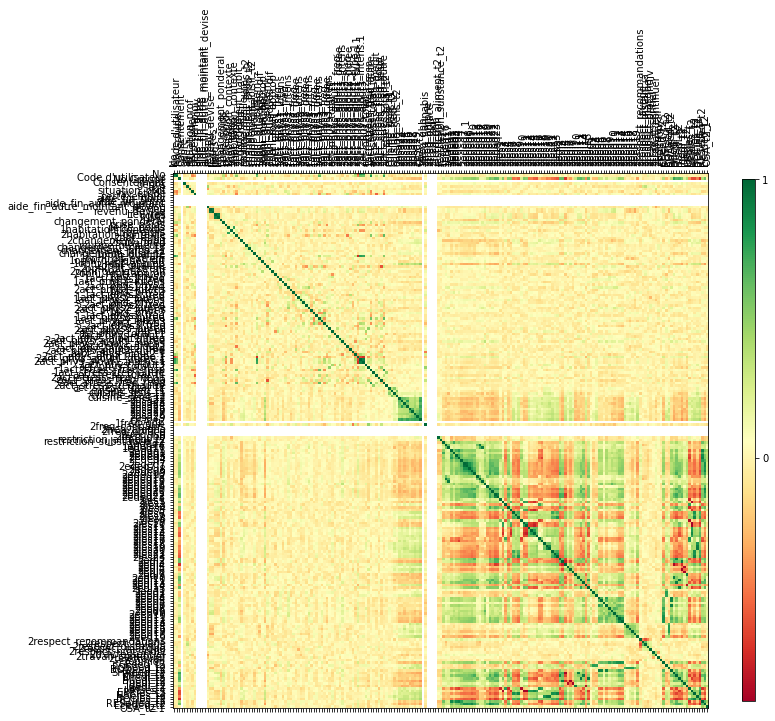

In [24]:
plot_corr(df255, size=12)


In [25]:
#import scipy
#import scipy.cluster.hierarchy as sch

#X = df255.corr().values
#d = sch.distance.pdist(X)   
#L = sch.linkage(d, method='complete')
#ind = sch.fcluster(L, 0.5*d.max(), 'distance')
#columns = [df255.columns.tolist()[i] for i in list((np.argsort(ind)))]
#df255r = df255.reindex(columns, axis='columns')

#plot_corr(df255r, size=18)

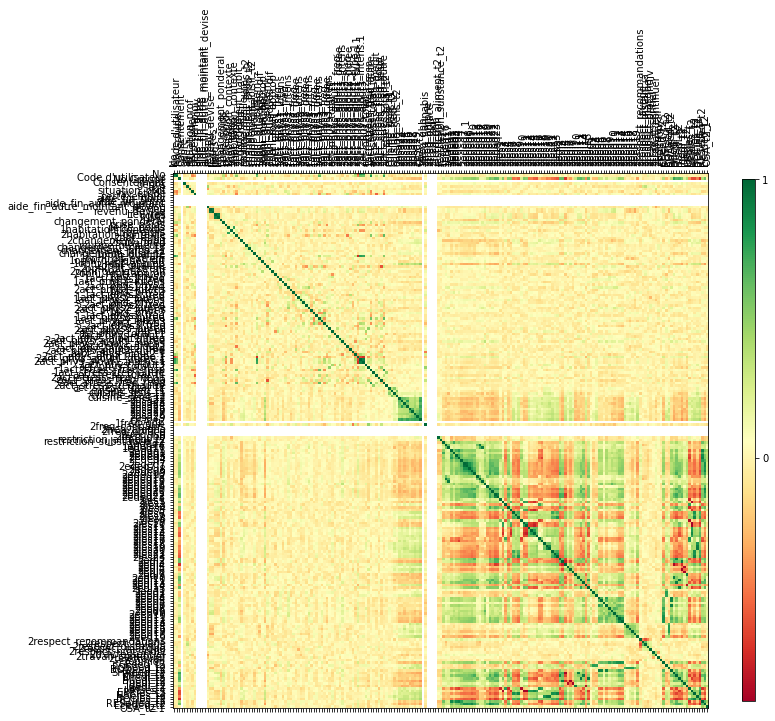

In [26]:
plot_corr(df255, size=12)

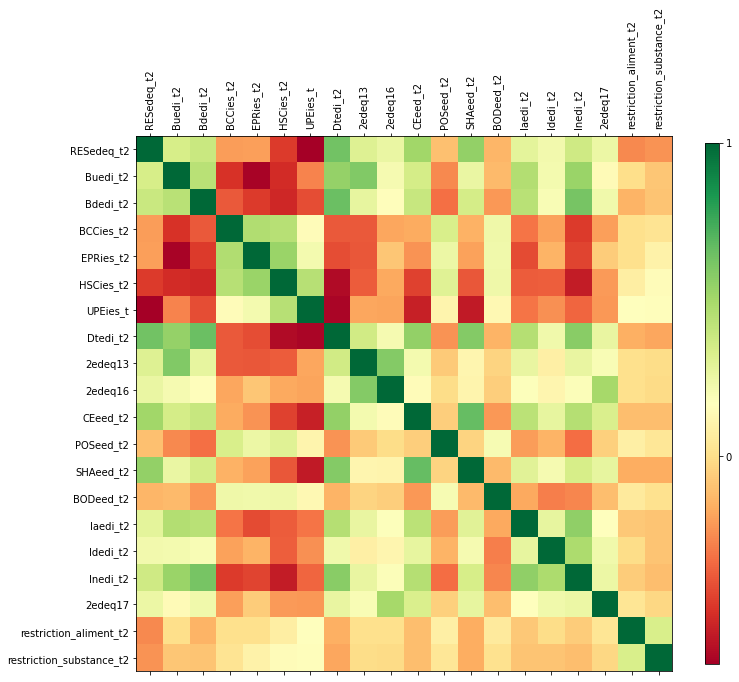

In [27]:
plot_corr(df20, size=12)


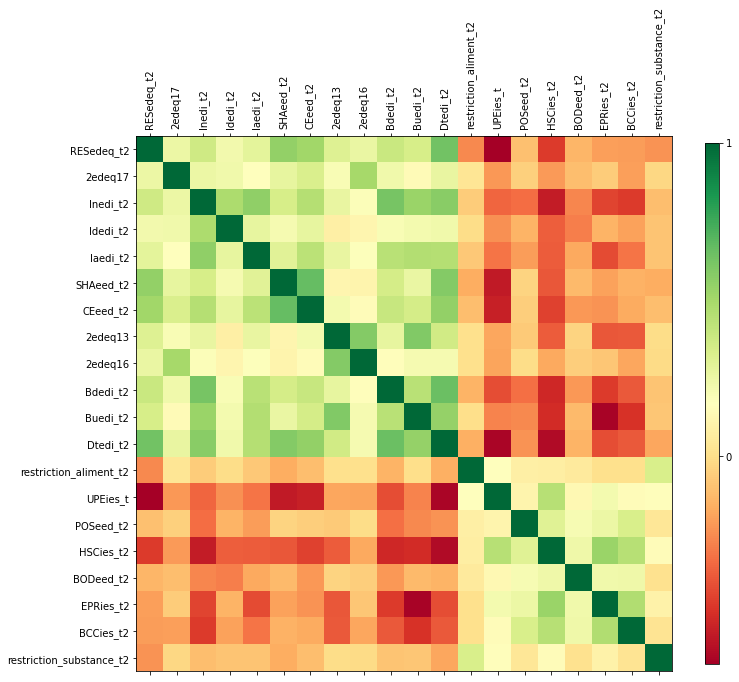

In [28]:
import scipy
import scipy.cluster.hierarchy as sch

X = df20.corr().values
d = sch.distance.pdist(X)   
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df20.columns.tolist()[i] for i in list((np.argsort(ind)))]
df20r = df20.reindex(columns, axis='columns')

plot_corr(df20r, size=12)

In [29]:
df7.corr()


,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t
RESedeq_t2,1.000000,0.339572,0.383420,-0.207080,-0.199502,-0.465499,-0.664298
Buedi_t2,0.339572,1.000000,0.438408,-0.494551,-0.650158,-0.512061,-0.272469
Bdedi_t2,0.383420,0.438408,1.000000,-0.383338,-0.465255,-0.527027,-0.410955
BCCies_t2,-0.207080,-0.494551,-0.383338,1.000000,0.462410,0.442244,0.151628
EPRies_t2,-0.199502,-0.650158,-0.465255,0.462410,1.000000,0.528889,0.217947
HSCies_t2,-0.465499,-0.512061,-0.527027,0.442244,0.528889,1.000000,0.445762
UPEies_t,-0.664298,-0.272469,-0.410955,0.151628,0.217947,0.445762,1.000000


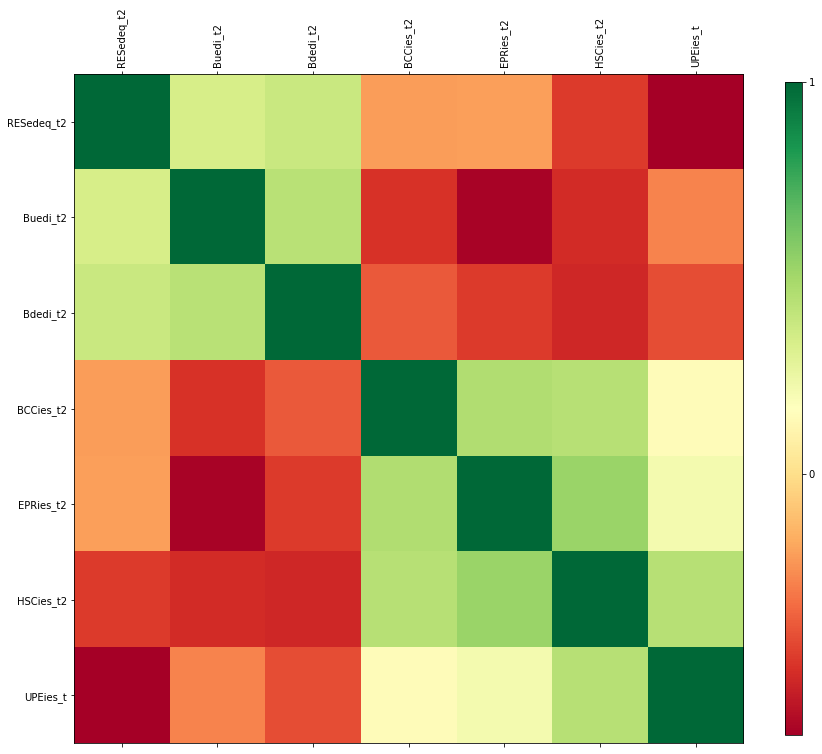

In [30]:
plot_corr(df7, size=15)


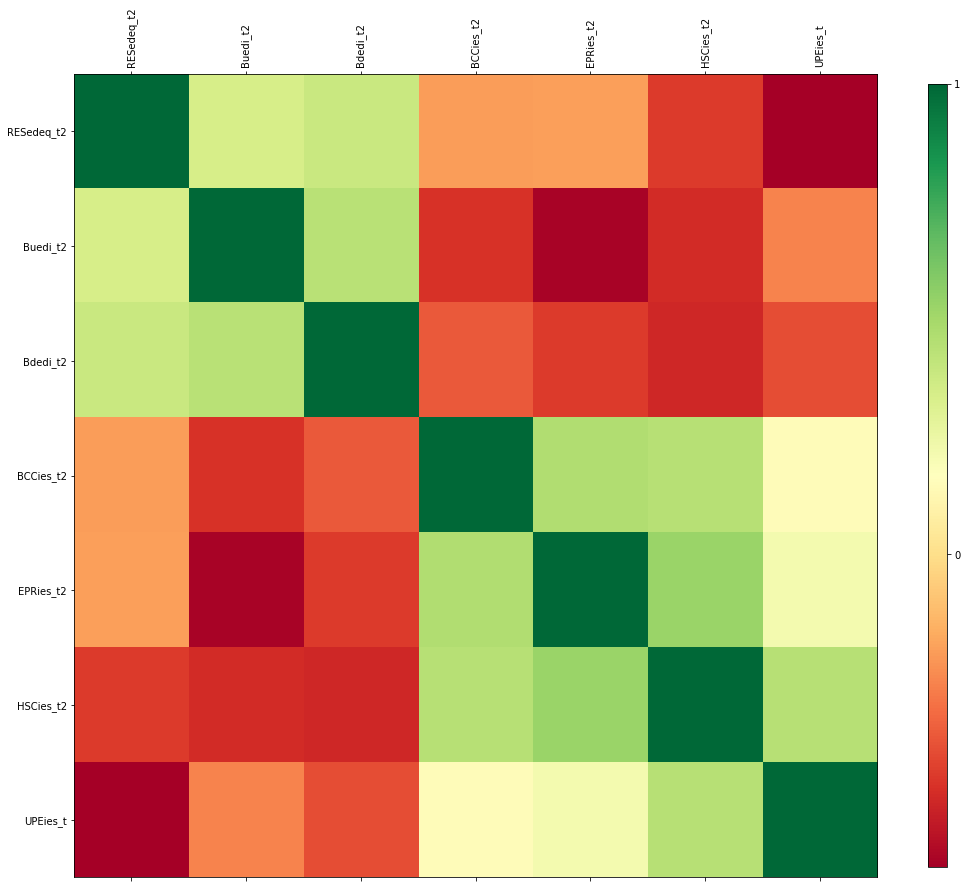

In [31]:
import scipy
import scipy.cluster.hierarchy as sch

X = df7.corr().values
d = sch.distance.pdist(X)   
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df7.columns.tolist()[i] for i in list((np.argsort(ind)))]
df7r = df7.reindex(columns, axis='columns')

plot_corr(df7r, size=18)

# Elbow and Kmeans

In [96]:
from sklearn.cluster import KMeans
from sklearn import datasets
iris = datasets.load_iris()

In [97]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df20)
    distortions.append(kmeanModel.inertia_)

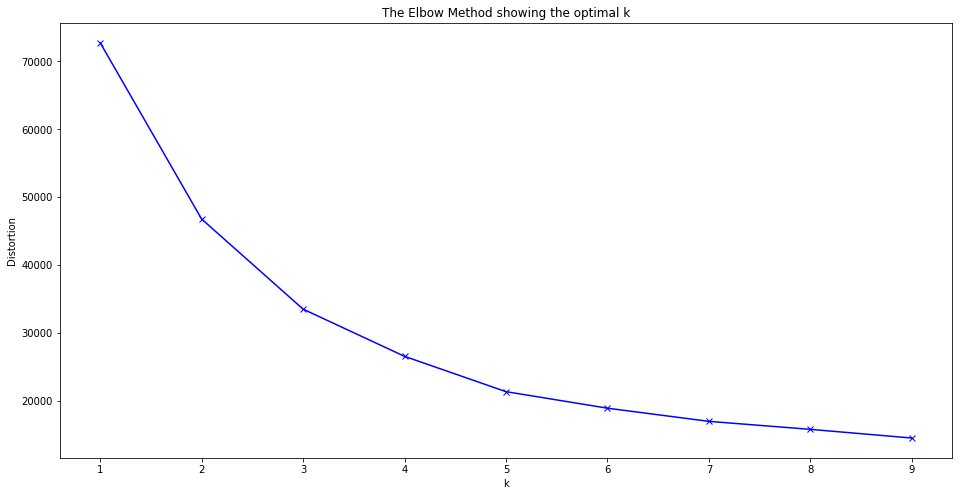

In [98]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##Agglomerative Clustering

####n=3 for df7

In [389]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(df7)

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1,
       2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [390]:
c=cluster.labels_
nc0_mean=[]
nc1_mean=[]
nc2_mean=[]
for i in range(len(c)):
  if c[i]==0:
    nc0_mean.append(i)
  if c[i]==1:
    nc1_mean.append(i)
  if c[i]==2:
    nc2_mean.append(i)

In [391]:
df7_t=df7.transpose()
df7_t

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467
RESedeq_t2,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.0000,0.000,0.0000,0.00,...,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.00,0.0000,0.000,0.0000,0.00,0.000,0.00,0.00
Buedi_t2,2.322581,2.322581,2.322581,1.00,0.00,1.00,1.500,2.00,1.000,0.00,0.00,0.000,0.00,4.00,4.000000,4.000000,4.00,3.00,6.00,4.000000,2.000000,0.00,0.00,3.00,4.00,10.00,6.500,3.00,1.500,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.2500,0.500,0.7500,1.00,...,5.500,10.00,6.00,2.00,1.00,2.00,2.000,2.00,4.000,6.00,3.50,1.00,2.00,4.00,4.400,4.800,5.200,5.600,6.00,3.00,6.00,3.000,0.00,3.00,1.00,6.00,0.00,1.00,4.500,8.00,4.000,0.00,2.00,1.5000,1.000,0.5000,0.00,0.500,1.00,6.00
Bdedi_t2,6.383871,6.383871,6.383871,4.00,2.00,7.00,7.000,7.00,5.000,3.00,5.00,4.500,4.00,11.00,9.333333,7.666667,6.00,8.00,7.00,7.333333,7.666667,8.00,3.00,5.00,11.00,11.00,8.000,5.00,7.000,9.00,7.500,6.00,4.00,9.00,4.00,2.00,3.0000,4.000,5.0000,6.00,...,7.000,9.00,6.00,5.00,4.00,3.00,3.500,4.00,7.500,11.00,11.00,6.00,1.00,6.00,6.600,7.200,7.800,8.400,9.00,7.00,7.00,7.500,8.00,11.00,10.00,10.00,11.00,9.00,9.000,9.00,5.000,1.00,6.00,5.7500,5.500,5.2500,5.00,3.500,2.00,6.00
BCCies_t2,3.852065,3.852065,3.852065,3.67,4.00,4.00,4.000,4.00,4.500,5.00,3.67,3.835,4.00,4.00,4.000000,3.665000,3.33,3.67,2.33,3.220000,4.110000,5.00,4.67,4.00,2.33,1.33,3.000,4.67,4.835,5.00,5.000,5.00,4.67,3.00,4.33,4.00,4.2500,4.500,4.7500,5.00,...,3.335,2.67,3.67,2.67,4.33,4.00,3.835,3.67,4.000,4.33,3.00,3.67,4.00,2.33,2.464,2.598,2.732,2.866,3.00,4.00,4.00,3.500,3.00,3.67,4.00,2.33,2.00,3.33,2.665,2.00,3.500,5.00,5.00,5.0000,5.000,5.0000,5.00,5.000,5.00,3.67
EPRies_t2,3.219333,3.219333,3.219333,4.63,3.63,2.63,2.880,3.13,3.815,4.50,4.50,4.190,3.88,2.75,4.500000,3.565000,2.63,2.63,2.00,2.666667,3.333333,4.00,4.13,2.13,1.63,1.50,2.315,3.13,3.380,3.63,3.815,4.00,2.13,2.88,4.13,4.50,4.1575,3.815,3.4725,3.13,...,2.625,2.25,2.13,3.13,3.63,3.25,3.000,2.75,2.565,2.38,1.50,3.38,3.13,3.00,2.950,2.900,2.850,2.800,2.75,3.13,1.88,2.755,3.63,2.75,3.50,1.63,2.25,4.50,3.065,1.63,3.065,4.50,4.13,3.6925,3.255,2.8175,2.38,3.315,4.25,4.50
HSCies_t2,3.052613,3.052613,3.052613,3.17,4.17,3.00,2.835,2.67,3.670,4.67,3.83,4.000,4.17,2.17,2.223333,2.276667,2.33,1.83,1.33,1.553333,1.776667,2.00,4.83,2.67,3.50,2.00,2.915,3.83,4.165,4.50,4.085,3.67,2.00,3.33,4.00,3.50,3.3750,3.250,3.1250,3.00,...,2.585,1.00,1.83,4.00,4.83,4.67,4.085,3.50,2.915,2.33,1.00,3.17,3.83,2.83,2.664,2.498,2.332,2.166,2.00,3.33,2.00,2.665,3.33,3.67,2.33,1.33,2.00,5.00,3.000,1.00,3.000,5.00,4.60,4.2000,3.800,3.4000,3.00,3.665,4.33,3.00
UPEies_t,3.297989,3.297989,3.297989,4.83,4.33,3.17,3.420,3.67,4.335,5.00,4.83,4.415,4.00,3.00,4.500000,4.165000,3.83,3.33,3.33,3.330000,3.330000,3.33,3.50,3.83,3.00,2.00,2.500,3.00,2.165,1.33,1.750,2.17,4.83,4.00,3.83,4.67,3.7950,2.920,2.0450,1.17,...,3.000,2.00,3.00,2.67,4.33,4.33,3.915,3.50,3.085,2.67,2.33,3.50,3.83,3.33,3.398,3.466,3.534,3.602,3.67,3.17,2.00,2.915,3.83,3.33,1.17,4.17,3.50,4.17,4.250,4.33,4.500,4.67,4.83,4.1225,3.415,2.7075,2.00,2.585,3.17,2.33


In [392]:
from pandas import DataFrame
dfcl0_mean=[]
dfcl1_mean=[]
dfcl2_mean=[]
for i in range(len(nc0_mean)):
  j=nc0_mean[i]
  dfcl0_mean.append(df7_t[j])
dfq0_mean = DataFrame(dfcl0_mean)
for i in range(len(nc1_mean)):
  w=nc1_mean[i]
  dfcl1_mean.append(df7_t[w])
dfq1_mean = DataFrame(dfcl1_mean)
for i in range(len(nc2_mean)):
  t=nc2_mean[i]
  dfcl2_mean.append(df7_t[t])
dfq2_mean = DataFrame(dfcl2_mean)

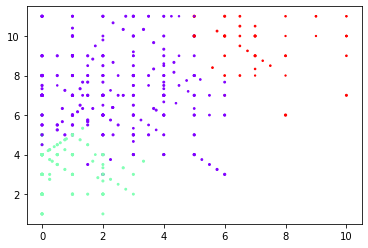

In [393]:
plt.scatter(df7['Buedi_t2'],df7['Bdedi_t2'],df7['BCCies_t2'], c=cluster.labels_, cmap='rainbow')


In [394]:
nc_mean= [len(nc0_mean),len(nc1_mean),len(nc2_mean)]
nc_mean_percent= [(len(nc0_mean)*100)/468,(len(nc1_mean)*100)/468,(len(nc2_mean)*100)/468]
print(len(nc0_mean)+len(nc1_mean)+len(nc2_mean))
print(nc_mean)
print(nc_mean_percent)

468
[281, 141, 46]
[60.042735042735046, 30.128205128205128, 9.82905982905983]


Text(0, 0.5, '7 columns, 3 clusters')

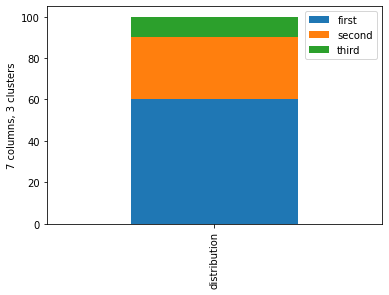

In [395]:
plotdata = pd.DataFrame({
    "distribution":[len(nc0_mean),len(nc1_mean),len(nc2_mean)],
    }, index=["first", "second", "third"]
)
plotdata.head()
plotdata.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
#plt.title("Mince Pie Consumption Per Year")
#plt.xlabel("Year")
plt.ylabel("7 columns, 3 clusters")

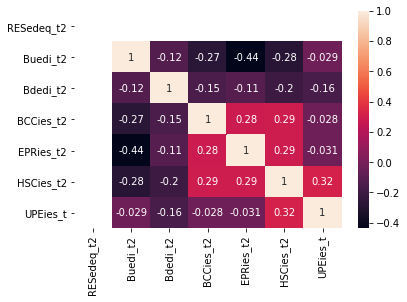

In [396]:
sns.heatmap(dfq0_mean.corr(), annot=True);

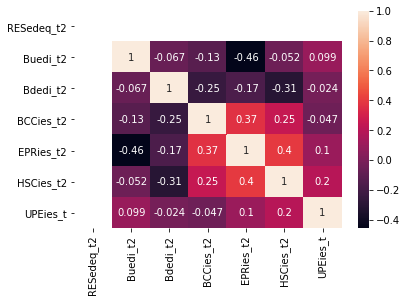

In [397]:
sns.heatmap(dfq1_mean.corr(), annot=True);

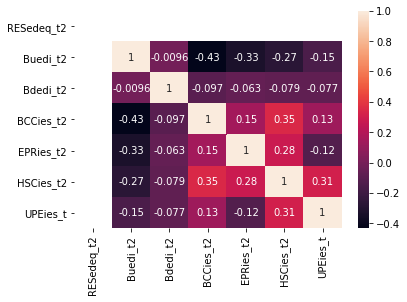

In [398]:
sns.heatmap(dfq2_mean.corr(), annot=True);

In [399]:
x1 = 'RESedeq_t2'
x2 = 'Buedi_t2'
x3 = 'Bdedi_t2'
x4 = 'BCCies_t2'
x5 = 'EPRies_t2'
x6 = 'HSCies_t2'
x7 = 'UPEies_t'





cluster1_x1_low = []
cluster1_x1_med = []
cluster1_x1_high = []





for i in nc0_mean:
  if df7[x1][i]<(2*np.min(df7[x1])+np.max(df7[x1]))/3:
    cluster1_x1_low.append(i)
  if (2*np.min(df7[x1])+np.max(df7[x1]))/3<=df7[x1][i]<=(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster1_x1_med.append(i)   
  if df7[x1][i]>(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster1_x1_high.append(i)




cluster1_x2_low = []
cluster1_x2_med = []
cluster1_x2_high = []





for i in nc0_mean:
  if df7[x2][i]<(2*np.min(df7[x2])+np.max(df7[x2]))/3:
    cluster1_x2_low.append(i)
  if (2*np.min(df7[x2])+np.max(df7[x2]))/3<=df7[x2][i]<=(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster1_x2_med.append(i)   
  if df7[x2][i]>(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster1_x2_high.append(i)




cluster1_x3_low = []
cluster1_x3_med = []
cluster1_x3_high = []





for i in nc0_mean:
  if df7[x3][i]<(2*np.min(df7[x3])+np.max(df7[x3]))/3:
    cluster1_x3_low.append(i)
  if (2*np.min(df7[x3])+np.max(df7[x3]))/3<=df7[x3][i]<=(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster1_x3_med.append(i)   
  if df7[x3][i]>(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster1_x3_high.append(i)






cluster1_x4_low = []
cluster1_x4_med = []
cluster1_x4_high = []






for i in nc0_mean:
  if df7[x4][i]<(2*np.min(df7[x4])+np.max(df7[x4]))/3:
    cluster1_x4_low.append(i)
  if (2*np.min(df7[x4])+np.max(df7[x4]))/3<=df7[x4][i]<=(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster1_x4_med.append(i)   
  if df7[x4][i]>(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster1_x4_high.append(i)





cluster1_x5_low= []
cluster1_x5_med = []
cluster1_x5_high = []






for i in nc0_mean:
  if df7[x5][i]<(2*np.min(df7[x5])+np.max(df7[x5]))/3:
    cluster1_x5_low.append(i)
  if (2*np.min(df7[x5])+np.max(df7[x5]))/3<=df7[x5][i]<=(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster1_x5_med.append(i)   
  if df7[x5][i]>(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster1_x5_high.append(i)







cluster1_x6_low = []
cluster1_x6_med = []
cluster1_x6_high = []






for i in nc0_mean:
  if df7[x6][i]<(2*np.min(df7[x6])+np.max(df7[x6]))/3:
    cluster1_x6_low.append(i)
  if (2*np.min(df7[x6])+np.max(df7[x6]))/3<=df7[x6][i]<=(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster1_x6_med.append(i)   
  if df7[x6][i]>(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster1_x6_high.append(i)





cluster1_x7_low = []
cluster1_x7_med = []
cluster1_x7_high = []





for i in nc0_mean:
  if df7[x7][i]<(2*np.min(df7[x7])+np.max(df7[x7]))/3:
    cluster1_x7_low.append(i)
  if (2*np.min(df7[x7])+np.max(df7[x7]))/3<=df7[x7][i]<=(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster1_x7_med.append(i)   
  if df7[x7][i]>(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster1_x7_high.append(i)

In [400]:
x1 = 'RESedeq_t2'
x2 = 'Buedi_t2'
x3 = 'Bdedi_t2'
x4 = 'BCCies_t2'
x5 = 'EPRies_t2'
x6 = 'HSCies_t2'
x7 = 'UPEies_t'




cluster2_x1_low = []
cluster2_x1_med = []
cluster2_x1_high = []



for i in nc1_mean:
  if df7[x1][i]<(2*np.min(df7[x1])+np.max(df7[x1]))/3:
    cluster2_x1_low.append(i)
  if (2*np.min(df7[x1])+np.max(df7[x1]))/3<=df7[x1][i]<=(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster2_x1_med.append(i)   
  if df7[x1][i]>(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster2_x1_high.append(i)





cluster2_x2_low = []
cluster2_x2_med = []
cluster2_x2_high = []



for i in nc1_mean:
  if df7[x2][i]<(2*np.min(df7[x2])+np.max(df7[x2]))/3:
    cluster2_x2_low.append(i)
  if (2*np.min(df7[x2])+np.max(df7[x2]))/3<=df7[x2][i]<=(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster2_x2_med.append(i)   
  if df7[x2][i]>(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster2_x2_high.append(i)





cluster2_x3_low = []
cluster2_x3_med = []
cluster2_x3_high = []



for i in nc1_mean:
  if df7[x3][i]<(2*np.min(df7[x3])+np.max(df7[x3]))/3:
    cluster2_x3_low.append(i)
  if (2*np.min(df7[x3])+np.max(df7[x3]))/3<=df7[x3][i]<=(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster2_x3_med.append(i)   
  if df7[x3][i]>(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster2_x3_high.append(i)




cluster2_x4_low = []
cluster2_x4_med = []
cluster2_x4_high = []




for i in nc1_mean:
  if df7[x4][i]<(2*np.min(df7[x4])+np.max(df7[x4]))/3:
    cluster2_x4_low.append(i)
  if (2*np.min(df7[x4])+np.max(df7[x4]))/3<=df7[x4][i]<=(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster2_x4_med.append(i)   
  if df7[x4][i]>(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster2_x4_high.append(i)



cluster2_x5_low= []
cluster2_x5_med = []
cluster2_x5_high = []




for i in nc1_mean:
  if df7[x5][i]<(2*np.min(df7[x5])+np.max(df7[x5]))/3:
    cluster2_x5_low.append(i)
  if (2*np.min(df7[x5])+np.max(df7[x5]))/3<=df7[x5][i]<=(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster2_x5_med.append(i)   
  if df7[x5][i]>(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster2_x5_high.append(i)




cluster2_x6_low = []
cluster2_x6_med = []
cluster2_x6_high = []




for i in nc1_mean:
  if df7[x6][i]<(2*np.min(df7[x6])+np.max(df7[x6]))/3:
    cluster2_x6_low.append(i)
  if (2*np.min(df7[x6])+np.max(df7[x6]))/3<=df7[x6][i]<=(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster2_x6_med.append(i)   
  if df7[x6][i]>(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster2_x6_high.append(i)


cluster2_x7_low = []
cluster2_x7_med = []
cluster2_x7_high = []



for i in nc1_mean:
  if df7[x7][i]<(2*np.min(df7[x7])+np.max(df7[x7]))/3:
    cluster2_x7_low.append(i)
  if (2*np.min(df7[x7])+np.max(df7[x7]))/3<=df7[x7][i]<=(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster2_x7_med.append(i)   
  if df7[x7][i]>(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster2_x7_high.append(i)


In [401]:
x1 = 'RESedeq_t2'
x2 = 'Buedi_t2'
x3 = 'Bdedi_t2'
x4 = 'BCCies_t2'
x5 = 'EPRies_t2'
x6 = 'HSCies_t2'
x7 = 'UPEies_t'






cluster3_x1_low = []
cluster3_x1_med = []
cluster3_x1_high = []






for i in nc2_mean:
  if df7[x1][i]<(2*np.min(df7[x1])+np.max(df7[x1]))/3:
    cluster3_x1_low.append(i)
  if (2*np.min(df7[x1])+np.max(df7[x1]))/3<=df7[x1][i]<=(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster3_x1_med.append(i)   
  if df7[x1][i]>(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster3_x1_high.append(i)





cluster3_x2_low = []
cluster3_x2_med = []
cluster3_x2_high = []






for i in nc2_mean:
  if df7[x2][i]<(2*np.min(df7[x2])+np.max(df7[x2]))/3:
    cluster3_x2_low.append(i)
  if (2*np.min(df7[x2])+np.max(df7[x2]))/3<=df7[x2][i]<=(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster3_x2_med.append(i)   
  if df7[x2][i]>(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster3_x2_high.append(i)





cluster3_x3_low = []
cluster3_x3_med = []
cluster3_x3_high = []






for i in nc2_mean:
  if df7[x3][i]<(2*np.min(df7[x3])+np.max(df7[x3]))/3:
    cluster3_x3_low.append(i)
  if (2*np.min(df7[x3])+np.max(df7[x3]))/3<=df7[x3][i]<=(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster3_x3_med.append(i)   
  if df7[x3][i]>(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster3_x3_high.append(i)







cluster3_x4_low = []
cluster3_x4_med = []
cluster3_x4_high = []







for i in nc2_mean:
  if df7[x4][i]<(2*np.min(df7[x4])+np.max(df7[x4]))/3:
    cluster3_x4_low.append(i)
  if (2*np.min(df7[x4])+np.max(df7[x4]))/3<=df7[x4][i]<=(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster3_x4_med.append(i)   
  if df7[x4][i]>(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster3_x4_high.append(i)






cluster3_x5_low= []
cluster3_x5_med = []
cluster3_x5_high = []







for i in nc2_mean:
  if df7[x5][i]<(2*np.min(df7[x5])+np.max(df7[x5]))/3:
    cluster3_x5_low.append(i)
  if (2*np.min(df7[x5])+np.max(df7[x5]))/3<=df7[x5][i]<=(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster3_x5_med.append(i)   
  if df7[x5][i]>(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster3_x5_high.append(i)








cluster3_x6_low = []
cluster3_x6_med = []
cluster3_x6_high = []







for i in nc2_mean:
  if df7[x6][i]<(2*np.min(df7[x6])+np.max(df7[x6]))/3:
    cluster3_x6_low.append(i)
  if (2*np.min(df7[x6])+np.max(df7[x6]))/3<=df7[x6][i]<=(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster3_x6_med.append(i)   
  if df7[x6][i]>(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster3_x6_high.append(i)






cluster3_x7_low = []
cluster3_x7_med = []
cluster3_x7_high = []






for i in nc2_mean:
  if df7[x7][i]<(2*np.min(df7[x7])+np.max(df7[x7]))/3:
    cluster3_x7_low.append(i)
  if (2*np.min(df7[x7])+np.max(df7[x7]))/3<=df7[x7][i]<=(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster3_x7_med.append(i)   
  if df7[x7][i]>(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster3_x7_high.append(i)


Text(0, 0.5, 'First Cluster for df7')

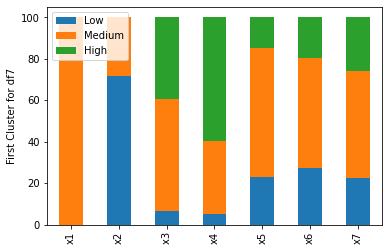

In [402]:
plotdata = pd.DataFrame({
    "x1":[len(cluster1_x1_low), len(cluster1_x1_med), len(cluster1_x1_high)],
    "x2":[len(cluster1_x2_low), len(cluster1_x2_med), len(cluster1_x2_high)],
    "‎x3":[len(cluster1_x3_low), len(cluster1_x3_med), len(cluster1_x3_high)],
    "x4":[len(cluster1_x4_low), len(cluster1_x4_med), len(cluster1_x4_high)],
    "x5":[len(cluster1_x5_low), len(cluster1_x5_med), len(cluster1_x5_high)],
    "x6":[len(cluster1_x6_low), len(cluster1_x6_med), len(cluster1_x6_high)],
    "x7":[len(cluster1_x7_low), len(cluster1_x7_med), len(cluster1_x7_high)]
    }, index=["Low", "Medium", "High"]
)
plotdata.head()
plotdata.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
#plt.title("Mince Pie Consumption Per Year")
#plt.xlabel("Year")
plt.ylabel("First Cluster for df7")

Text(0, 0.5, 'Second Cluster for df7')

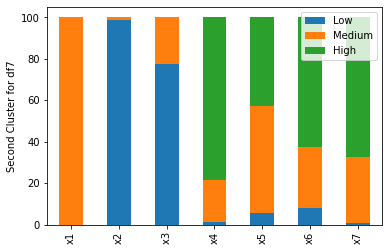

In [403]:
plotdata = pd.DataFrame({
    "x1":[len(cluster2_x1_low), len(cluster2_x1_med), len(cluster2_x1_high)],
    "x2":[len(cluster2_x2_low), len(cluster2_x2_med), len(cluster2_x2_high)],
    "‎x3":[len(cluster2_x3_low), len(cluster2_x3_med), len(cluster2_x3_high)],
    "x4":[len(cluster2_x4_low), len(cluster2_x4_med), len(cluster2_x4_high)],
    "x5":[len(cluster2_x5_low), len(cluster2_x5_med), len(cluster2_x5_high)],
    "x6":[len(cluster2_x6_low), len(cluster2_x6_med), len(cluster2_x6_high)],
    "x7":[len(cluster2_x7_low), len(cluster2_x7_med), len(cluster2_x7_high)]
    }, index=["Low", "Medium", "High"]
)
plotdata.head()
plotdata.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
#plt.title("Mince Pie Consumption Per Year")
#plt.xlabel("Year")
plt.ylabel("Second Cluster for df7")

Text(0, 0.5, 'Third Cluster for df7')

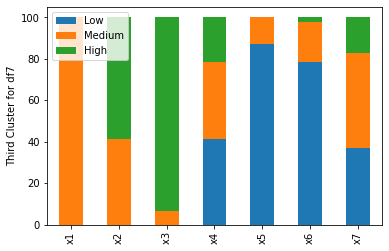

In [404]:
plotdata = pd.DataFrame({
    "x1":[len(cluster3_x1_low), len(cluster3_x1_med), len(cluster3_x1_high)],
    "x2":[len(cluster3_x2_low), len(cluster3_x2_med), len(cluster3_x2_high)],
    "‎x3":[len(cluster3_x3_low), len(cluster3_x3_med), len(cluster3_x3_high)],
    "x4":[len(cluster3_x4_low), len(cluster3_x4_med), len(cluster3_x4_high)],
    "x5":[len(cluster3_x5_low), len(cluster3_x5_med), len(cluster3_x5_high)],
    "x6":[len(cluster3_x6_low), len(cluster3_x6_med), len(cluster3_x6_high)],
    "x7":[len(cluster3_x7_low), len(cluster3_x7_med), len(cluster3_x7_high)]
    }, index=["Low", "Medium", "High"]
)
plotdata.head()
plotdata.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
#plt.title("Mince Pie Consumption Per Year")
#plt.xlabel("Year")
plt.ylabel("Third Cluster for df7")

####n=5 for df7

In [405]:
from sklearn.cluster import AgglomerativeClustering


cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df7)

array([1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 4, 0, 0, 0, 1, 2, 0, 1, 1,
       3, 0, 4, 2, 2, 0, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 1, 0, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 4, 3, 0, 3, 3, 0, 3, 3, 3, 3,
       3, 1, 1, 1, 3, 1, 0, 0, 3, 1, 1, 0, 1, 0, 1, 1, 3, 0, 0, 4, 3, 4,
       0, 0, 0, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 3, 0, 0, 2, 3, 1, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 0, 1, 4, 2, 2, 3,
       0, 0, 1, 0, 3, 3, 1, 1, 0, 2, 2, 2, 4, 4, 1, 1, 1, 2, 3, 0, 0, 0,
       1, 1, 3, 3, 3, 4, 2, 2, 3, 3, 0, 1, 3, 2, 2, 4, 1, 1, 1, 1, 1, 3,
       2, 0, 3, 0, 2, 0, 1, 4, 4, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       3, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 4, 4, 4, 4,
       0, 0, 0, 1, 1, 3, 3, 3, 3, 3, 0, 4, 4, 4, 4, 4, 3, 0, 0, 2, 1, 1,
       0, 3, 3, 0, 3, 2, 3, 4, 1, 3, 3, 3, 3, 0, 1, 1, 1, 3, 3, 0, 0, 2,
       2, 4, 4, 4, 4, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,

In [406]:
c=cluster.labels_
nc0_mean=[]
nc1_mean=[]
nc2_mean=[]
nc3_mean=[]
nc4_mean=[]
for i in range(len(c)):
  if c[i]==0:
    nc0_mean.append(i)
  if c[i]==1:
    nc1_mean.append(i)
  if c[i]==2:
    nc2_mean.append(i)
  if c[i]==3:
    nc3_mean.append(i)
  if c[i]==4:
    nc4_mean.append(i)

In [407]:
c=cluster.labels_
nc0_mean=[]
nc1_mean=[]
nc2_mean=[]
nc3_mean=[]
nc4_mean=[]
nc5_mean=[]
nc6_mean=[]
for i in range(len(c)):
  if c[i]==0:
    nc0_mean.append(i)
  if c[i]==1:
    nc1_mean.append(i)
  if c[i]==2:
    nc2_mean.append(i)
  if c[i]==3:
    nc3_mean.append(i)
  if c[i]==4:
    nc4_mean.append(i)
  if c[i]==5:
    nc5_mean.append(i)
  if c[i]==6:
    nc6_mean.append(i)

####n=7 for df7

In [347]:
df7 = df_7_newindexed.replace(np.nan, df_7_newindexed.mean())
df7

,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t
0,1.476559,2.322581,6.383871,3.852065,3.219333,3.052613,3.297989
1,1.476559,2.322581,6.383871,3.852065,3.219333,3.052613,3.297989
2,1.476559,2.322581,6.383871,3.852065,3.219333,3.052613,3.297989
3,0.400000,1.000000,4.000000,3.670000,4.630000,3.170000,4.830000
4,0.600000,0.000000,2.000000,4.000000,3.630000,4.170000,4.330000
...,...,...,...,...,...,...,...
463,1.200000,0.500000,5.250000,5.000000,2.817500,3.400000,2.707500
464,1.600000,0.000000,5.000000,5.000000,2.380000,3.000000,2.000000
465,0.800000,0.500000,3.500000,5.000000,3.315000,3.665000,2.585000
466,0.000000,1.000000,2.000000,5.000000,4.250000,4.330000,3.170000


In [348]:
df7 = df7.assign(RESedeq_t2=df7['RESedeq_t2'].min())
df7

,RESedeq_t2,Buedi_t2,Bdedi_t2,BCCies_t2,EPRies_t2,HSCies_t2,UPEies_t
0,0.0,2.322581,6.383871,3.852065,3.219333,3.052613,3.297989
1,0.0,2.322581,6.383871,3.852065,3.219333,3.052613,3.297989
2,0.0,2.322581,6.383871,3.852065,3.219333,3.052613,3.297989
3,0.0,1.000000,4.000000,3.670000,4.630000,3.170000,4.830000
4,0.0,0.000000,2.000000,4.000000,3.630000,4.170000,4.330000
...,...,...,...,...,...,...,...
463,0.0,0.500000,5.250000,5.000000,2.817500,3.400000,2.707500
464,0.0,0.000000,5.000000,5.000000,2.380000,3.000000,2.000000
465,0.0,0.500000,3.500000,5.000000,3.315000,3.665000,2.585000
466,0.0,1.000000,2.000000,5.000000,4.250000,4.330000,3.170000


In [349]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
cluster.fit_predict(df7)

array([4, 4, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 1, 5, 5, 5, 6, 2, 5, 6, 6,
       0, 3, 1, 2, 2, 3, 4, 6, 6, 4, 0, 6, 0, 0, 0, 0, 4, 4, 5, 6, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 2, 1, 0, 5, 0, 0, 5, 0, 0, 0, 0,
       0, 6, 6, 4, 0, 6, 3, 5, 0, 4, 4, 5, 4, 5, 4, 4, 0, 3, 5, 1, 0, 1,
       5, 5, 3, 6, 6, 1, 6, 4, 6, 4, 6, 6, 6, 5, 3, 3, 3, 3, 3, 5, 5, 2,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 5, 5, 2, 0, 4, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 6, 4, 4, 0, 6, 5, 6, 1, 2, 2, 0,
       5, 5, 4, 5, 0, 0, 4, 6, 5, 2, 2, 2, 1, 1, 6, 6, 6, 2, 0, 3, 3, 3,
       6, 6, 0, 0, 0, 1, 2, 2, 0, 0, 3, 6, 0, 2, 2, 1, 6, 6, 6, 4, 4, 0,
       2, 5, 0, 5, 2, 3, 6, 1, 1, 6, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 6, 6,
       0, 5, 5, 4, 4, 4, 5, 6, 4, 6, 6, 4, 4, 6, 6, 1, 6, 2, 1, 1, 1, 1,
       5, 5, 5, 4, 4, 0, 0, 0, 0, 0, 3, 1, 1, 1, 1, 1, 0, 5, 3, 2, 6, 6,
       3, 0, 0, 5, 0, 2, 0, 1, 6, 0, 0, 0, 0, 5, 4, 4, 4, 0, 0, 3, 5, 2,
       2, 1, 1, 1, 1, 5, 5, 5, 6, 6, 6, 6, 6, 4, 3,

In [350]:
c=cluster.labels_
nc0_mean=[]
nc1_mean=[]
nc2_mean=[]
nc3_mean=[]
nc4_mean=[]
nc5_mean=[]
nc6_mean=[]
for i in range(len(c)):
  if c[i]==0:
    nc0_mean.append(i)
  if c[i]==1:
    nc1_mean.append(i)
  if c[i]==2:
    nc2_mean.append(i)
  if c[i]==3:
    nc3_mean.append(i)
  if c[i]==4:
    nc4_mean.append(i)
  if c[i]==5:
    nc5_mean.append(i)
  if c[i]==6:
    nc6_mean.append(i)

In [351]:
df7_t=df7.transpose()


In [352]:
from pandas import DataFrame
dfcl0_mean=[]
dfcl1_mean=[]
dfcl2_mean=[]
dfcl3_mean=[]
dfcl4_mean=[]
dfcl5_mean=[]
dfcl6_mean=[]
for i in range(len(nc0_mean)):
  j=nc0_mean[i]
  dfcl0_mean.append(df7_t[j])
dfq0_mean = DataFrame(dfcl0_mean)
for i in range(len(nc1_mean)):
  w=nc1_mean[i]
  dfcl1_mean.append(df7_t[w])
dfq1_mean = DataFrame(dfcl1_mean)
for i in range(len(nc2_mean)):
  t=nc2_mean[i]
  dfcl2_mean.append(df7_t[t])
dfq2_mean = DataFrame(dfcl2_mean)
for i in range(len(nc3_mean)):
  r=nc3_mean[i]
  dfcl3_mean.append(df7_t[r])
dfq3_mean = DataFrame(dfcl3_mean)
for i in range(len(nc4_mean)):
  s=nc4_mean[i]
  dfcl4_mean.append(df7_t[s])
dfq4_mean = DataFrame(dfcl4_mean)
for i in range(len(nc5_mean)):
  u=nc5_mean[i]
  dfcl5_mean.append(df7_t[u])
dfq5_mean = DataFrame(dfcl5_mean)
for i in range(len(nc6_mean)):
  v=nc6_mean[i]
  dfcl6_mean.append(df7_t[v])
dfq6_mean = DataFrame(dfcl6_mean)

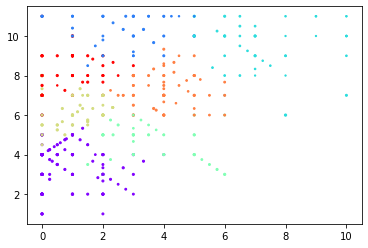

In [353]:
plt.scatter(df7['Buedi_t2'],df7['Bdedi_t2'],df7['BCCies_t2'], c=cluster.labels_, cmap='rainbow')

In [354]:
nc_mean= [len(nc0_mean),len(nc1_mean),len(nc2_mean),len(nc3_mean),len(nc4_mean),len(nc5_mean),len(nc6_mean)]
nc_mean_percent= [(len(nc0_mean)*100)/468,(len(nc1_mean)*100)/468,(len(nc2_mean)*100)/468,(len(nc3_mean)*100)/468,(len(nc4_mean)*100)/468,(len(nc5_mean)*100)/468,(len(nc6_mean)*100)/468]

print(len(nc0_mean)+len(nc1_mean)+len(nc2_mean)+len(nc3_mean)+len(nc4_mean)+len(nc5_mean)+len(nc6_mean))
print(nc_mean)
print(nc_mean_percent)

468
[141, 44, 46, 44, 65, 63, 65]
[30.128205128205128, 9.401709401709402, 9.82905982905983, 9.401709401709402, 13.88888888888889, 13.461538461538462, 13.88888888888889]


Text(0, 0.5, '7 columns, 7 clusters')

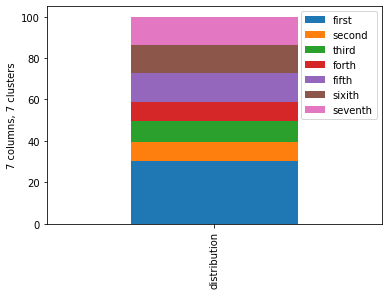

In [355]:
plotdata = pd.DataFrame({
    "distribution":[len(nc0_mean),len(nc1_mean),len(nc2_mean),len(nc3_mean),len(nc4_mean),len(nc5_mean),len(nc6_mean)],
    }, index=["first", "second", "third", "forth","fifth","sixith","seventh"]
)
plotdata.head()
plotdata.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
#plt.title("Mince Pie Consumption Per Year")
#plt.xlabel("Year")
plt.ylabel("7 columns, 7 clusters")

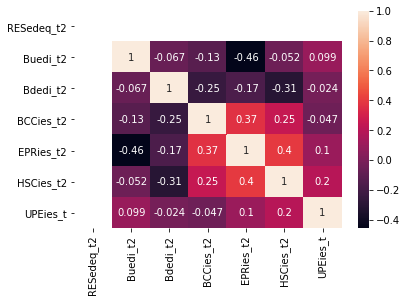

In [356]:
sns.heatmap(dfq0_mean.corr(), annot=True);

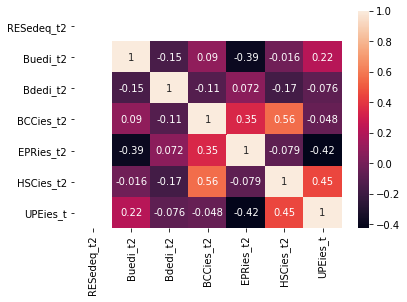

In [357]:
sns.heatmap(dfq1_mean.corr(), annot=True);

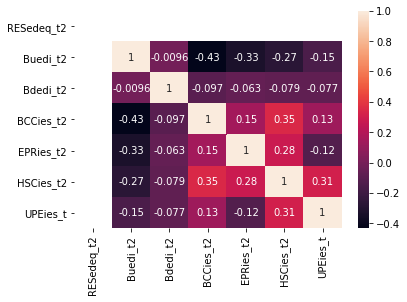

In [358]:
sns.heatmap(dfq2_mean.corr(), annot=True);

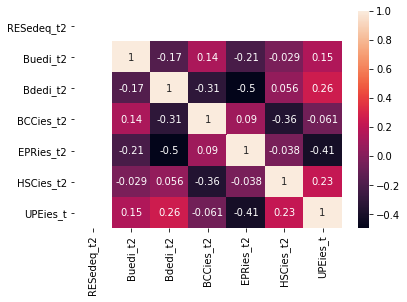

In [359]:
sns.heatmap(dfq3_mean.corr(), annot=True);

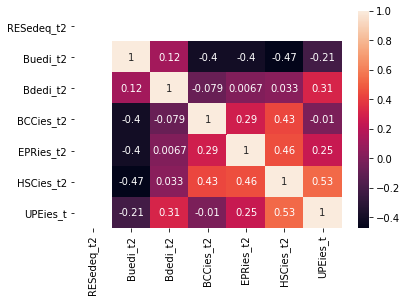

In [360]:
sns.heatmap(dfq4_mean.corr(), annot=True);

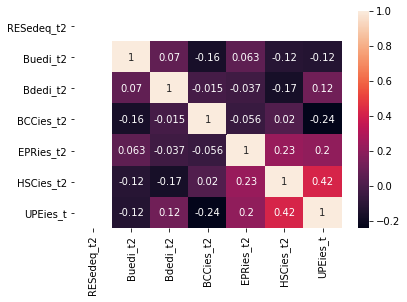

In [361]:
sns.heatmap(dfq5_mean.corr(), annot=True);

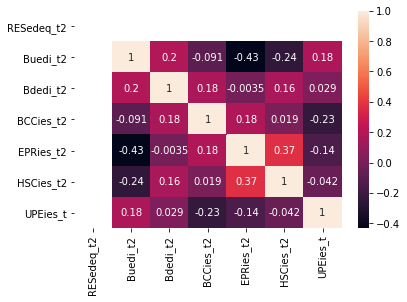

In [362]:
sns.heatmap(dfq6_mean.corr(), annot=True);

In [363]:
x1 = 'RESedeq_t2'
x2 = 'Buedi_t2'
x3 = 'Bdedi_t2'
x4 = 'BCCies_t2'
x5 = 'EPRies_t2'
x6 = 'HSCies_t2'
x7 = 'UPEies_t'







cluster1_x1_low = []
cluster1_x1_med = []
cluster1_x1_high = []







for i in nc0_mean:
  if df7[x1][i]<(2*np.min(df7[x1])+np.max(df7[x1]))/3:
    cluster1_x1_low.append(i)
  if (2*np.min(df7[x1])+np.max(df7[x1]))/3<=df7[x1][i]<=(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster1_x1_med.append(i)   
  if df7[x1][i]>(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster1_x1_high.append(i)






cluster1_x2_low = []
cluster1_x2_med = []
cluster1_x2_high = []







for i in nc0_mean:
  if df7[x2][i]<(2*np.min(df7[x2])+np.max(df7[x2]))/3:
    cluster1_x2_low.append(i)
  if (2*np.min(df7[x2])+np.max(df7[x2]))/3<=df7[x2][i]<=(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster1_x2_med.append(i)   
  if df7[x2][i]>(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster1_x2_high.append(i)






cluster1_x3_low = []
cluster1_x3_med = []
cluster1_x3_high = []







for i in nc0_mean:
  if df7[x3][i]<(2*np.min(df7[x3])+np.max(df7[x3]))/3:
    cluster1_x3_low.append(i)
  if (2*np.min(df7[x3])+np.max(df7[x3]))/3<=df7[x3][i]<=(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster1_x3_med.append(i)   
  if df7[x3][i]>(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster1_x3_high.append(i)








cluster1_x4_low = []
cluster1_x4_med = []
cluster1_x4_high = []








for i in nc0_mean:
  if df7[x4][i]<(2*np.min(df7[x4])+np.max(df7[x4]))/3:
    cluster1_x4_low.append(i)
  if (2*np.min(df7[x4])+np.max(df7[x4]))/3<=df7[x4][i]<=(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster1_x4_med.append(i)   
  if df7[x4][i]>(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster1_x4_high.append(i)







cluster1_x5_low= []
cluster1_x5_med = []
cluster1_x5_high = []








for i in nc0_mean:
  if df7[x5][i]<(2*np.min(df7[x5])+np.max(df7[x5]))/3:
    cluster1_x5_low.append(i)
  if (2*np.min(df7[x5])+np.max(df7[x5]))/3<=df7[x5][i]<=(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster1_x5_med.append(i)   
  if df7[x5][i]>(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster1_x5_high.append(i)









cluster1_x6_low = []
cluster1_x6_med = []
cluster1_x6_high = []








for i in nc0_mean:
  if df7[x6][i]<(2*np.min(df7[x6])+np.max(df7[x6]))/3:
    cluster1_x6_low.append(i)
  if (2*np.min(df7[x6])+np.max(df7[x6]))/3<=df7[x6][i]<=(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster1_x6_med.append(i)   
  if df7[x6][i]>(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster1_x6_high.append(i)







cluster1_x7_low = []
cluster1_x7_med = []
cluster1_x7_high = []







for i in nc0_mean:
  if df7[x7][i]<(2*np.min(df7[x7])+np.max(df7[x7]))/3:
    cluster1_x7_low.append(i)
  if (2*np.min(df7[x7])+np.max(df7[x7]))/3<=df7[x7][i]<=(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster1_x7_med.append(i)   
  if df7[x7][i]>(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster1_x7_high.append(i)



In [364]:
x1 = 'RESedeq_t2'
x2 = 'Buedi_t2'
x3 = 'Bdedi_t2'
x4 = 'BCCies_t2'
x5 = 'EPRies_t2'
x6 = 'HSCies_t2'
x7 = 'UPEies_t'







cluster2_x1_low = []
cluster2_x1_med = []
cluster2_x1_high = []







for i in nc1_mean:
  if df7[x1][i]<(2*np.min(df7[x1])+np.max(df7[x1]))/3:
    cluster2_x1_low.append(i)
  if (2*np.min(df7[x1])+np.max(df7[x1]))/3<=df7[x1][i]<=(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster2_x1_med.append(i)   
  if df7[x1][i]>(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster2_x1_high.append(i)






cluster2_x2_low = []
cluster2_x2_med = []
cluster2_x2_high = []







for i in nc1_mean:
  if df7[x2][i]<(2*np.min(df7[x2])+np.max(df7[x2]))/3:
    cluster2_x2_low.append(i)
  if (2*np.min(df7[x2])+np.max(df7[x2]))/3<=df7[x2][i]<=(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster2_x2_med.append(i)   
  if df7[x2][i]>(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster2_x2_high.append(i)






cluster2_x3_low = []
cluster2_x3_med = []
cluster2_x3_high = []







for i in nc1_mean:
  if df7[x3][i]<(2*np.min(df7[x3])+np.max(df7[x3]))/3:
    cluster2_x3_low.append(i)
  if (2*np.min(df7[x3])+np.max(df7[x3]))/3<=df7[x3][i]<=(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster2_x3_med.append(i)   
  if df7[x3][i]>(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster2_x3_high.append(i)








cluster2_x4_low = []
cluster2_x4_med = []
cluster2_x4_high = []








for i in nc1_mean:
  if df7[x4][i]<(2*np.min(df7[x4])+np.max(df7[x4]))/3:
    cluster2_x4_low.append(i)
  if (2*np.min(df7[x4])+np.max(df7[x4]))/3<=df7[x4][i]<=(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster2_x4_med.append(i)   
  if df7[x4][i]>(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster2_x4_high.append(i)







cluster2_x5_low= []
cluster2_x5_med = []
cluster2_x5_high = []








for i in nc1_mean:
  if df7[x5][i]<(2*np.min(df7[x5])+np.max(df7[x5]))/3:
    cluster2_x5_low.append(i)
  if (2*np.min(df7[x5])+np.max(df7[x5]))/3<=df7[x5][i]<=(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster2_x5_med.append(i)   
  if df7[x5][i]>(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster2_x5_high.append(i)









cluster2_x6_low = []
cluster2_x6_med = []
cluster2_x6_high = []








for i in nc1_mean:
  if df7[x6][i]<(2*np.min(df7[x6])+np.max(df7[x6]))/3:
    cluster2_x6_low.append(i)
  if (2*np.min(df7[x6])+np.max(df7[x6]))/3<=df7[x6][i]<=(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster2_x6_med.append(i)   
  if df7[x6][i]>(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster2_x6_high.append(i)







cluster2_x7_low = []
cluster2_x7_med = []
cluster2_x7_high = []







for i in nc1_mean:
  if df7[x7][i]<(2*np.min(df7[x7])+np.max(df7[x7]))/3:
    cluster2_x7_low.append(i)
  if (2*np.min(df7[x7])+np.max(df7[x7]))/3<=df7[x7][i]<=(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster2_x7_med.append(i)   
  if df7[x7][i]>(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster2_x7_high.append(i)



In [365]:
x1 = 'RESedeq_t2'
x2 = 'Buedi_t2'
x3 = 'Bdedi_t2'
x4 = 'BCCies_t2'
x5 = 'EPRies_t2'
x6 = 'HSCies_t2'
x7 = 'UPEies_t'







cluster3_x1_low = []
cluster3_x1_med = []
cluster3_x1_high = []







for i in nc2_mean:
  if df7[x1][i]<(2*np.min(df7[x1])+np.max(df7[x1]))/3:
    cluster3_x1_low.append(i)
  if (2*np.min(df7[x1])+np.max(df7[x1]))/3<=df7[x1][i]<=(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster3_x1_med.append(i)   
  if df7[x1][i]>(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster3_x1_high.append(i)






cluster3_x2_low = []
cluster3_x2_med = []
cluster3_x2_high = []







for i in nc2_mean:
  if df7[x2][i]<(2*np.min(df7[x2])+np.max(df7[x2]))/3:
    cluster3_x2_low.append(i)
  if (2*np.min(df7[x2])+np.max(df7[x2]))/3<=df7[x2][i]<=(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster3_x2_med.append(i)   
  if df7[x2][i]>(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster3_x2_high.append(i)






cluster3_x3_low = []
cluster3_x3_med = []
cluster3_x3_high = []







for i in nc2_mean:
  if df7[x3][i]<(2*np.min(df7[x3])+np.max(df7[x3]))/3:
    cluster3_x3_low.append(i)
  if (2*np.min(df7[x3])+np.max(df7[x3]))/3<=df7[x3][i]<=(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster3_x3_med.append(i)   
  if df7[x3][i]>(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster3_x3_high.append(i)








cluster3_x4_low = []
cluster3_x4_med = []
cluster3_x4_high = []








for i in nc2_mean:
  if df7[x4][i]<(2*np.min(df7[x4])+np.max(df7[x4]))/3:
    cluster3_x4_low.append(i)
  if (2*np.min(df7[x4])+np.max(df7[x4]))/3<=df7[x4][i]<=(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster3_x4_med.append(i)   
  if df7[x4][i]>(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster3_x4_high.append(i)







cluster3_x5_low= []
cluster3_x5_med = []
cluster3_x5_high = []








for i in nc2_mean:
  if df7[x5][i]<(2*np.min(df7[x5])+np.max(df7[x5]))/3:
    cluster3_x5_low.append(i)
  if (2*np.min(df7[x5])+np.max(df7[x5]))/3<=df7[x5][i]<=(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster3_x5_med.append(i)   
  if df7[x5][i]>(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster3_x5_high.append(i)









cluster3_x6_low = []
cluster3_x6_med = []
cluster3_x6_high = []








for i in nc2_mean:
  if df7[x6][i]<(2*np.min(df7[x6])+np.max(df7[x6]))/3:
    cluster3_x6_low.append(i)
  if (2*np.min(df7[x6])+np.max(df7[x6]))/3<=df7[x6][i]<=(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster3_x6_med.append(i)   
  if df7[x6][i]>(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster3_x6_high.append(i)







cluster3_x7_low = []
cluster3_x7_med = []
cluster3_x7_high = []







for i in nc2_mean:
  if df7[x7][i]<(2*np.min(df7[x7])+np.max(df7[x7]))/3:
    cluster3_x7_low.append(i)
  if (2*np.min(df7[x7])+np.max(df7[x7]))/3<=df7[x7][i]<=(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster3_x7_med.append(i)   
  if df7[x7][i]>(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster3_x7_high.append(i)



In [366]:
x1 = 'RESedeq_t2'
x2 = 'Buedi_t2'
x3 = 'Bdedi_t2'
x4 = 'BCCies_t2'
x5 = 'EPRies_t2'
x6 = 'HSCies_t2'
x7 = 'UPEies_t'







cluster4_x1_low = []
cluster4_x1_med = []
cluster4_x1_high = []







for i in nc3_mean:
  if df7[x1][i]<(2*np.min(df7[x1])+np.max(df7[x1]))/3:
    cluster4_x1_low.append(i)
  if (2*np.min(df7[x1])+np.max(df7[x1]))/3<=df7[x1][i]<=(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster4_x1_med.append(i)   
  if df7[x1][i]>(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster4_x1_high.append(i)






cluster4_x2_low = []
cluster4_x2_med = []
cluster4_x2_high = []







for i in nc3_mean:
  if df7[x2][i]<(2*np.min(df7[x2])+np.max(df7[x2]))/3:
    cluster4_x2_low.append(i)
  if (2*np.min(df7[x2])+np.max(df7[x2]))/3<=df7[x2][i]<=(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster4_x2_med.append(i)   
  if df7[x2][i]>(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster4_x2_high.append(i)






cluster4_x3_low = []
cluster4_x3_med = []
cluster4_x3_high = []







for i in nc3_mean:
  if df7[x3][i]<(2*np.min(df7[x3])+np.max(df7[x3]))/3:
    cluster4_x3_low.append(i)
  if (2*np.min(df7[x3])+np.max(df7[x3]))/3<=df7[x3][i]<=(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster4_x3_med.append(i)   
  if df7[x3][i]>(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster4_x3_high.append(i)








cluster4_x4_low = []
cluster4_x4_med = []
cluster4_x4_high = []








for i in nc3_mean:
  if df7[x4][i]<(2*np.min(df7[x4])+np.max(df7[x4]))/3:
    cluster4_x4_low.append(i)
  if (2*np.min(df7[x4])+np.max(df7[x4]))/3<=df7[x4][i]<=(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster4_x4_med.append(i)   
  if df7[x4][i]>(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster4_x4_high.append(i)







cluster4_x5_low= []
cluster4_x5_med = []
cluster4_x5_high = []








for i in nc3_mean:
  if df7[x5][i]<(2*np.min(df7[x5])+np.max(df7[x5]))/3:
    cluster4_x5_low.append(i)
  if (2*np.min(df7[x5])+np.max(df7[x5]))/3<=df7[x5][i]<=(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster4_x5_med.append(i)   
  if df7[x5][i]>(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster4_x5_high.append(i)









cluster4_x6_low = []
cluster4_x6_med = []
cluster4_x6_high = []








for i in nc3_mean:
  if df7[x6][i]<(2*np.min(df7[x6])+np.max(df7[x6]))/3:
    cluster4_x6_low.append(i)
  if (2*np.min(df7[x6])+np.max(df7[x6]))/3<=df7[x6][i]<=(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster4_x6_med.append(i)   
  if df7[x6][i]>(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster4_x6_high.append(i)







cluster4_x7_low = []
cluster4_x7_med = []
cluster4_x7_high = []







for i in nc3_mean:
  if df7[x7][i]<(2*np.min(df7[x7])+np.max(df7[x7]))/3:
    cluster4_x7_low.append(i)
  if (2*np.min(df7[x7])+np.max(df7[x7]))/3<=df7[x7][i]<=(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster4_x7_med.append(i)   
  if df7[x7][i]>(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster4_x7_high.append(i)



In [367]:
x1 = 'RESedeq_t2'
x2 = 'Buedi_t2'
x3 = 'Bdedi_t2'
x4 = 'BCCies_t2'
x5 = 'EPRies_t2'
x6 = 'HSCies_t2'
x7 = 'UPEies_t'







cluster5_x1_low = []
cluster5_x1_med = []
cluster5_x1_high = []







for i in nc4_mean:
  if df7[x1][i]<(2*np.min(df7[x1])+np.max(df7[x1]))/3:
    cluster5_x1_low.append(i)
  if (2*np.min(df7[x1])+np.max(df7[x1]))/3<=df7[x1][i]<=(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster5_x1_med.append(i)   
  if df7[x1][i]>(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster5_x1_high.append(i)






cluster5_x2_low = []
cluster5_x2_med = []
cluster5_x2_high = []







for i in nc4_mean:
  if df7[x2][i]<(2*np.min(df7[x2])+np.max(df7[x2]))/3:
    cluster5_x2_low.append(i)
  if (2*np.min(df7[x2])+np.max(df7[x2]))/3<=df7[x2][i]<=(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster5_x2_med.append(i)   
  if df7[x2][i]>(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster5_x2_high.append(i)






cluster5_x3_low = []
cluster5_x3_med = []
cluster5_x3_high = []







for i in nc4_mean:
  if df7[x3][i]<(2*np.min(df7[x3])+np.max(df7[x3]))/3:
    cluster5_x3_low.append(i)
  if (2*np.min(df7[x3])+np.max(df7[x3]))/3<=df7[x3][i]<=(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster5_x3_med.append(i)   
  if df7[x3][i]>(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster5_x3_high.append(i)








cluster5_x4_low = []
cluster5_x4_med = []
cluster5_x4_high = []








for i in nc4_mean:
  if df7[x4][i]<(2*np.min(df7[x4])+np.max(df7[x4]))/3:
    cluster5_x4_low.append(i)
  if (2*np.min(df7[x4])+np.max(df7[x4]))/3<=df7[x4][i]<=(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster5_x4_med.append(i)   
  if df7[x4][i]>(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster5_x4_high.append(i)







cluster5_x5_low= []
cluster5_x5_med = []
cluster5_x5_high = []








for i in nc4_mean:
  if df7[x5][i]<(2*np.min(df7[x5])+np.max(df7[x5]))/3:
    cluster5_x5_low.append(i)
  if (2*np.min(df7[x5])+np.max(df7[x5]))/3<=df7[x5][i]<=(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster5_x5_med.append(i)   
  if df7[x5][i]>(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster5_x5_high.append(i)









cluster5_x6_low = []
cluster5_x6_med = []
cluster5_x6_high = []








for i in nc4_mean:
  if df7[x6][i]<(2*np.min(df7[x6])+np.max(df7[x6]))/3:
    cluster5_x6_low.append(i)
  if (2*np.min(df7[x6])+np.max(df7[x6]))/3<=df7[x6][i]<=(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster5_x6_med.append(i)   
  if df7[x6][i]>(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster5_x6_high.append(i)







cluster5_x7_low = []
cluster5_x7_med = []
cluster5_x7_high = []







for i in nc4_mean:
  if df7[x7][i]<(2*np.min(df7[x7])+np.max(df7[x7]))/3:
    cluster5_x7_low.append(i)
  if (2*np.min(df7[x7])+np.max(df7[x7]))/3<=df7[x7][i]<=(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster5_x7_med.append(i)   
  if df7[x7][i]>(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster5_x7_high.append(i)



In [368]:
x1 = 'RESedeq_t2'
x2 = 'Buedi_t2'
x3 = 'Bdedi_t2'
x4 = 'BCCies_t2'
x5 = 'EPRies_t2'
x6 = 'HSCies_t2'
x7 = 'UPEies_t'







cluster6_x1_low = []
cluster6_x1_med = []
cluster6_x1_high = []







for i in nc5_mean:
  if df7[x1][i]<(2*np.min(df7[x1])+np.max(df7[x1]))/3:
    cluster6_x1_low.append(i)
  if (2*np.min(df7[x1])+np.max(df7[x1]))/3<=df7[x1][i]<=(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster6_x1_med.append(i)   
  if df7[x1][i]>(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster6_x1_high.append(i)






cluster6_x2_low = []
cluster6_x2_med = []
cluster6_x2_high = []







for i in nc5_mean:
  if df7[x2][i]<(2*np.min(df7[x2])+np.max(df7[x2]))/3:
    cluster6_x2_low.append(i)
  if (2*np.min(df7[x2])+np.max(df7[x2]))/3<=df7[x2][i]<=(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster6_x2_med.append(i)   
  if df7[x2][i]>(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster6_x2_high.append(i)






cluster6_x3_low = []
cluster6_x3_med = []
cluster6_x3_high = []







for i in nc5_mean:
  if df7[x3][i]<(2*np.min(df7[x3])+np.max(df7[x3]))/3:
    cluster6_x3_low.append(i)
  if (2*np.min(df7[x3])+np.max(df7[x3]))/3<=df7[x3][i]<=(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster6_x3_med.append(i)   
  if df7[x3][i]>(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster6_x3_high.append(i)








cluster6_x4_low = []
cluster6_x4_med = []
cluster6_x4_high = []








for i in nc5_mean:
  if df7[x4][i]<(2*np.min(df7[x4])+np.max(df7[x4]))/3:
    cluster6_x4_low.append(i)
  if (2*np.min(df7[x4])+np.max(df7[x4]))/3<=df7[x4][i]<=(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster6_x4_med.append(i)   
  if df7[x4][i]>(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster6_x4_high.append(i)







cluster6_x5_low= []
cluster6_x5_med = []
cluster6_x5_high = []








for i in nc5_mean:
  if df7[x5][i]<(2*np.min(df7[x5])+np.max(df7[x5]))/3:
    cluster6_x5_low.append(i)
  if (2*np.min(df7[x5])+np.max(df7[x5]))/3<=df7[x5][i]<=(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster6_x5_med.append(i)   
  if df7[x5][i]>(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster6_x5_high.append(i)









cluster6_x6_low = []
cluster6_x6_med = []
cluster6_x6_high = []








for i in nc5_mean:
  if df7[x6][i]<(2*np.min(df7[x6])+np.max(df7[x6]))/3:
    cluster6_x6_low.append(i)
  if (2*np.min(df7[x6])+np.max(df7[x6]))/3<=df7[x6][i]<=(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster6_x6_med.append(i)   
  if df7[x6][i]>(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster6_x6_high.append(i)







cluster6_x7_low = []
cluster6_x7_med = []
cluster6_x7_high = []







for i in nc5_mean:
  if df7[x7][i]<(2*np.min(df7[x7])+np.max(df7[x7]))/3:
    cluster6_x7_low.append(i)
  if (2*np.min(df7[x7])+np.max(df7[x7]))/3<=df7[x7][i]<=(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster6_x7_med.append(i)   
  if df7[x7][i]>(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster6_x7_high.append(i)



In [369]:
x1 = 'RESedeq_t2'
x2 = 'Buedi_t2'
x3 = 'Bdedi_t2'
x4 = 'BCCies_t2'
x5 = 'EPRies_t2'
x6 = 'HSCies_t2'
x7 = 'UPEies_t'







cluster7_x1_low = []
cluster7_x1_med = []
cluster7_x1_high = []







for i in nc6_mean:
  if df7[x1][i]<(2*np.min(df7[x1])+np.max(df7[x1]))/3:
    cluster7_x1_low.append(i)
  if (2*np.min(df7[x1])+np.max(df7[x1]))/3<=df7[x1][i]<=(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster7_x1_med.append(i)   
  if df7[x1][i]>(np.min(df7[x1])+2*np.max(df7[x1]))/3:
    cluster7_x1_high.append(i)






cluster7_x2_low = []
cluster7_x2_med = []
cluster7_x2_high = []







for i in nc6_mean:
  if df7[x2][i]<(2*np.min(df7[x2])+np.max(df7[x2]))/3:
    cluster7_x2_low.append(i)
  if (2*np.min(df7[x2])+np.max(df7[x2]))/3<=df7[x2][i]<=(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster7_x2_med.append(i)   
  if df7[x2][i]>(np.min(df7[x2])+2*np.max(df7[x2]))/3:
    cluster7_x2_high.append(i)






cluster7_x3_low = []
cluster7_x3_med = []
cluster7_x3_high = []







for i in nc6_mean:
  if df7[x3][i]<(2*np.min(df7[x3])+np.max(df7[x3]))/3:
    cluster7_x3_low.append(i)
  if (2*np.min(df7[x3])+np.max(df7[x3]))/3<=df7[x3][i]<=(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster7_x3_med.append(i)   
  if df7[x3][i]>(np.min(df7[x3])+2*np.max(df7[x3]))/3:
    cluster7_x3_high.append(i)








cluster7_x4_low = []
cluster7_x4_med = []
cluster7_x4_high = []








for i in nc6_mean:
  if df7[x4][i]<(2*np.min(df7[x4])+np.max(df7[x4]))/3:
    cluster7_x4_low.append(i)
  if (2*np.min(df7[x4])+np.max(df7[x4]))/3<=df7[x4][i]<=(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster7_x4_med.append(i)   
  if df7[x4][i]>(np.min(df7[x4])+2*np.max(df7[x4]))/3:
    cluster7_x4_high.append(i)







cluster7_x5_low= []
cluster7_x5_med = []
cluster7_x5_high = []








for i in nc6_mean:
  if df7[x5][i]<(2*np.min(df7[x5])+np.max(df7[x5]))/3:
    cluster7_x5_low.append(i)
  if (2*np.min(df7[x5])+np.max(df7[x5]))/3<=df7[x5][i]<=(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster7_x5_med.append(i)   
  if df7[x5][i]>(np.min(df7[x5])+2*np.max(df7[x5]))/3:
    cluster7_x5_high.append(i)









cluster7_x6_low = []
cluster7_x6_med = []
cluster7_x6_high = []








for i in nc6_mean:
  if df7[x6][i]<(2*np.min(df7[x6])+np.max(df7[x6]))/3:
    cluster7_x6_low.append(i)
  if (2*np.min(df7[x6])+np.max(df7[x6]))/3<=df7[x6][i]<=(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster7_x6_med.append(i)   
  if df7[x6][i]>(np.min(df7[x6])+2*np.max(df7[x6]))/3:
    cluster7_x6_high.append(i)







cluster7_x7_low = []
cluster7_x7_med = []
cluster7_x7_high = []







for i in nc6_mean:
  if df7[x7][i]<(2*np.min(df7[x7])+np.max(df7[x7]))/3:
    cluster7_x7_low.append(i)
  if (2*np.min(df7[x7])+np.max(df7[x7]))/3<=df7[x7][i]<=(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster7_x7_med.append(i)   
  if df7[x7][i]>(np.min(df7[x7])+2*np.max(df7[x7]))/3:
    cluster7_x7_high.append(i)



Text(0, 0.5, 'First Cluster for df7')

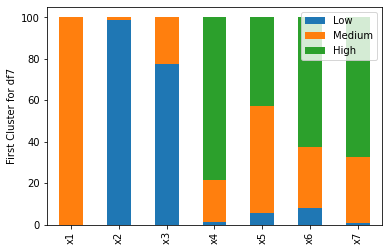

In [370]:
plotdata = pd.DataFrame({
    "x1":[len(cluster1_x1_low), len(cluster1_x1_med), len(cluster1_x1_high)],
    "x2":[len(cluster1_x2_low), len(cluster1_x2_med), len(cluster1_x2_high)],
    "‎x3":[len(cluster1_x3_low), len(cluster1_x3_med), len(cluster1_x3_high)],
    "x4":[len(cluster1_x4_low), len(cluster1_x4_med), len(cluster1_x4_high)],
    "x5":[len(cluster1_x5_low), len(cluster1_x5_med), len(cluster1_x5_high)],
    "x6":[len(cluster1_x6_low), len(cluster1_x6_med), len(cluster1_x6_high)],
    "x7":[len(cluster1_x7_low), len(cluster1_x7_med), len(cluster1_x7_high)]
    }, index=["Low", "Medium", "High"]
)
plotdata.head()
plotdata.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
#plt.title("Mince Pie Consumption Per Year")
#plt.xlabel("Year")
plt.ylabel("First Cluster for df7")

Text(0, 0.5, 'Second Cluster for df7')

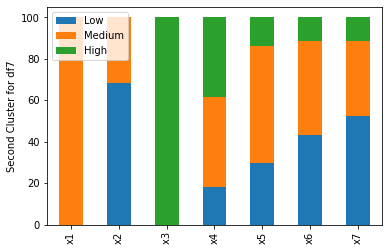

In [371]:
plotdata = pd.DataFrame({
    "x1":[len(cluster2_x1_low), len(cluster2_x1_med), len(cluster2_x1_high)],
    "x2":[len(cluster2_x2_low), len(cluster2_x2_med), len(cluster2_x2_high)],
    "‎x3":[len(cluster2_x3_low), len(cluster2_x3_med), len(cluster2_x3_high)],
    "x4":[len(cluster2_x4_low), len(cluster2_x4_med), len(cluster2_x4_high)],
    "x5":[len(cluster2_x5_low), len(cluster2_x5_med), len(cluster2_x5_high)],
    "x6":[len(cluster2_x6_low), len(cluster2_x6_med), len(cluster2_x6_high)],
    "x7":[len(cluster2_x7_low), len(cluster2_x7_med), len(cluster2_x7_high)]
    }, index=["Low", "Medium", "High"]
)
plotdata.head()
plotdata.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
#plt.title("Mince Pie Consumption Per Year")
#plt.xlabel("Year")
plt.ylabel("Second Cluster for df7")

Text(0, 0.5, 'Third Cluster for df7')

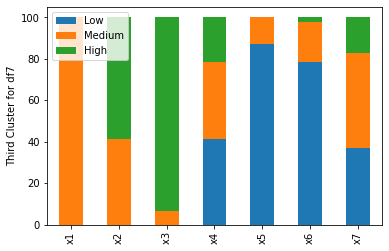

In [372]:
plotdata = pd.DataFrame({
    "x1":[len(cluster3_x1_low), len(cluster3_x1_med), len(cluster3_x1_high)],
    "x2":[len(cluster3_x2_low), len(cluster3_x2_med), len(cluster3_x2_high)],
    "‎x3":[len(cluster3_x3_low), len(cluster3_x3_med), len(cluster3_x3_high)],
    "x4":[len(cluster3_x4_low), len(cluster3_x4_med), len(cluster3_x4_high)],
    "x5":[len(cluster3_x5_low), len(cluster3_x5_med), len(cluster3_x5_high)],
    "x6":[len(cluster3_x6_low), len(cluster3_x6_med), len(cluster3_x6_high)],
    "x7":[len(cluster3_x7_low), len(cluster3_x7_med), len(cluster3_x7_high)]
    }, index=["Low", "Medium", "High"]
)
plotdata.head()
plotdata.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
#plt.title("Mince Pie Consumption Per Year")
#plt.xlabel("Year")
plt.ylabel("Third Cluster for df7")

Text(0, 0.5, 'Forth Cluster for df7')

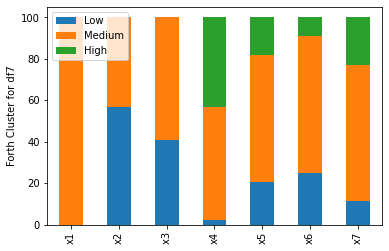

In [373]:
plotdata = pd.DataFrame({
    "x1":[len(cluster4_x1_low), len(cluster4_x1_med), len(cluster4_x1_high)],
    "x2":[len(cluster4_x2_low), len(cluster4_x2_med), len(cluster4_x2_high)],
    "‎x3":[len(cluster4_x3_low), len(cluster4_x3_med), len(cluster4_x3_high)],
    "x4":[len(cluster4_x4_low), len(cluster4_x4_med), len(cluster4_x4_high)],
    "x5":[len(cluster4_x5_low), len(cluster4_x5_med), len(cluster4_x5_high)],
    "x6":[len(cluster4_x6_low), len(cluster4_x6_med), len(cluster4_x6_high)],
    "x7":[len(cluster4_x7_low), len(cluster4_x7_med), len(cluster4_x7_high)]
    }, index=["Low", "Medium", "High"]
)
plotdata.head()
plotdata.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
#plt.title("Mince Pie Consumption Per Year")
#plt.xlabel("Year")
plt.ylabel("Forth Cluster for df7")

Text(0, 0.5, 'Fifth Cluster for df7')

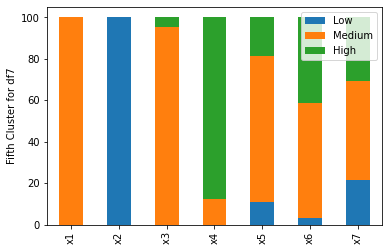

In [374]:
plotdata = pd.DataFrame({
    "x1":[len(cluster5_x1_low), len(cluster5_x1_med), len(cluster5_x1_high)],
    "x2":[len(cluster5_x2_low), len(cluster5_x2_med), len(cluster5_x2_high)],
    "‎x3":[len(cluster5_x3_low), len(cluster5_x3_med), len(cluster5_x3_high)],
    "x4":[len(cluster5_x4_low), len(cluster5_x4_med), len(cluster5_x4_high)],
    "x5":[len(cluster5_x5_low), len(cluster5_x5_med), len(cluster5_x5_high)],
    "x6":[len(cluster5_x6_low), len(cluster5_x6_med), len(cluster5_x6_high)],
    "x7":[len(cluster5_x7_low), len(cluster5_x7_med), len(cluster5_x7_high)]
    }, index=["Low", "Medium", "High"]
)
plotdata.head()
plotdata.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
#plt.title("Mince Pie Consumption Per Year")
#plt.xlabel("Year")
plt.ylabel("Fifth Cluster for df7")

Text(0, 0.5, 'Sixth Cluster for df7')

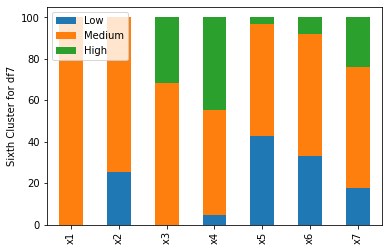

In [375]:
plotdata = pd.DataFrame({
    "x1":[len(cluster6_x1_low), len(cluster6_x1_med), len(cluster6_x1_high)],
    "x2":[len(cluster6_x2_low), len(cluster6_x2_med), len(cluster6_x2_high)],
    "‎x3":[len(cluster6_x3_low), len(cluster6_x3_med), len(cluster6_x3_high)],
    "x4":[len(cluster6_x4_low), len(cluster6_x4_med), len(cluster6_x4_high)],
    "x5":[len(cluster6_x5_low), len(cluster6_x5_med), len(cluster6_x5_high)],
    "x6":[len(cluster6_x6_low), len(cluster6_x6_med), len(cluster6_x6_high)],
    "x7":[len(cluster6_x7_low), len(cluster6_x7_med), len(cluster6_x7_high)]
    }, index=["Low", "Medium", "High"]
)
plotdata.head()
plotdata.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
#plt.title("Mince Pie Consumption Per Year")
#plt.xlabel("Year")
plt.ylabel("Sixth Cluster for df7")

Text(0, 0.5, 'Seventh Cluster for df7')

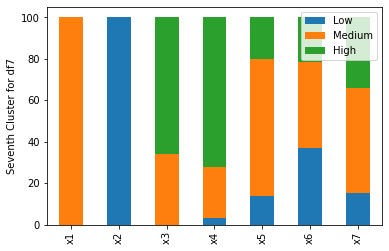

In [376]:
plotdata = pd.DataFrame({
    "x1":[len(cluster7_x1_low), len(cluster7_x1_med), len(cluster7_x1_high)],
    "x2":[len(cluster7_x2_low), len(cluster7_x2_med), len(cluster7_x2_high)],
    "‎x3":[len(cluster7_x3_low), len(cluster7_x3_med), len(cluster7_x3_high)],
    "x4":[len(cluster7_x4_low), len(cluster7_x4_med), len(cluster7_x4_high)],
    "x5":[len(cluster7_x5_low), len(cluster7_x5_med), len(cluster7_x5_high)],
    "x6":[len(cluster7_x6_low), len(cluster7_x6_med), len(cluster7_x6_high)],
    "x7":[len(cluster7_x7_low), len(cluster7_x7_med), len(cluster7_x7_high)]
    }, index=["Low", "Medium", "High"]
)
plotdata.head()
plotdata.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
#plt.title("Mince Pie Consumption Per Year")
#plt.xlabel("Year")
plt.ylabel("Seventh Cluster for df7")

df20

In [377]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(df20)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [378]:
c=cluster.labels_
nc0_mean=[]
nc1_mean=[]
nc2_mean=[]
for i in range(len(c)):
  if c[i]==0:
    nc0_mean.append(i)
  if c[i]==1:
    nc1_mean.append(i)
  if c[i]==2:
    nc2_mean.append(i)

In [379]:
df20_t=df20.transpose()


In [380]:
from pandas import DataFrame
dfcl0_mean=[]
dfcl1_mean=[]
dfcl2_mean=[]
for i in range(len(nc0_mean)):
  j=nc0_mean[i]
  dfcl0_mean.append(df20_t[j])
dfq0_mean = DataFrame(dfcl0_mean)
for i in range(len(nc1_mean)):
  w=nc1_mean[i]
  dfcl1_mean.append(df20_t[w])
dfq1_mean = DataFrame(dfcl1_mean)
for i in range(len(nc2_mean)):
  t=nc2_mean[i]
  dfcl2_mean.append(df20_t[t])
dfq2_mean = DataFrame(dfcl2_mean)

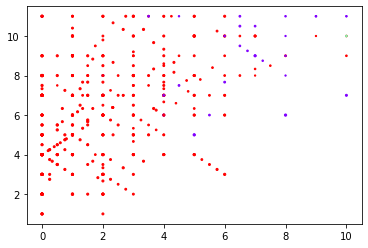

In [381]:
plt.scatter(df20['Buedi_t2'],df20['Bdedi_t2'],df20['BCCies_t2'], c=cluster.labels_, cmap='rainbow')


In [382]:
nc_mean= [len(nc0_mean),len(nc1_mean),len(nc2_mean)]
nc_mean_percent= [(len(nc0_mean)*100)/468,(len(nc1_mean)*100)/468,(len(nc2_mean)*100)/468]
print(len(nc0_mean)+len(nc1_mean)+len(nc2_mean))
print(nc_mean)
print(nc_mean_percent)

468
[33, 1, 434]
[7.051282051282051, 0.21367521367521367, 92.73504273504274]


Text(0, 0.5, '20 columns, 3 clusters')

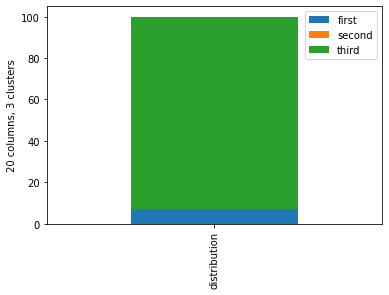

In [383]:
plotdata = pd.DataFrame({
    "distribution":[len(nc0_mean),len(nc1_mean),len(nc2_mean)],
    }, index=["first", "second", "third"]
)
plotdata.head()
plotdata.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True)
#plt.title("Mince Pie Consumption Per Year")
#plt.xlabel("Year")
plt.ylabel("20 columns, 3 clusters")

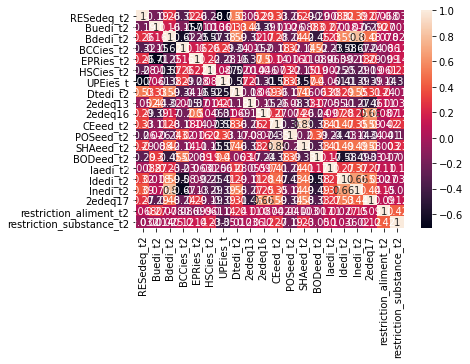

In [384]:
sns.heatmap(dfq0_mean.corr(), annot=True);

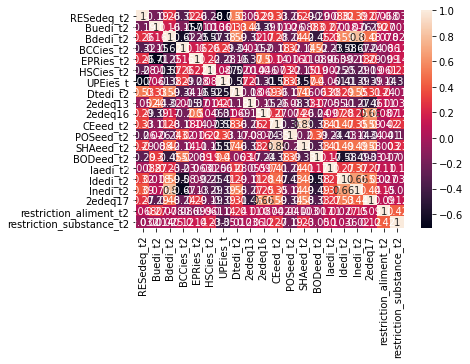

In [385]:
sns.heatmap(dfq0_mean.corr(), annot=True);

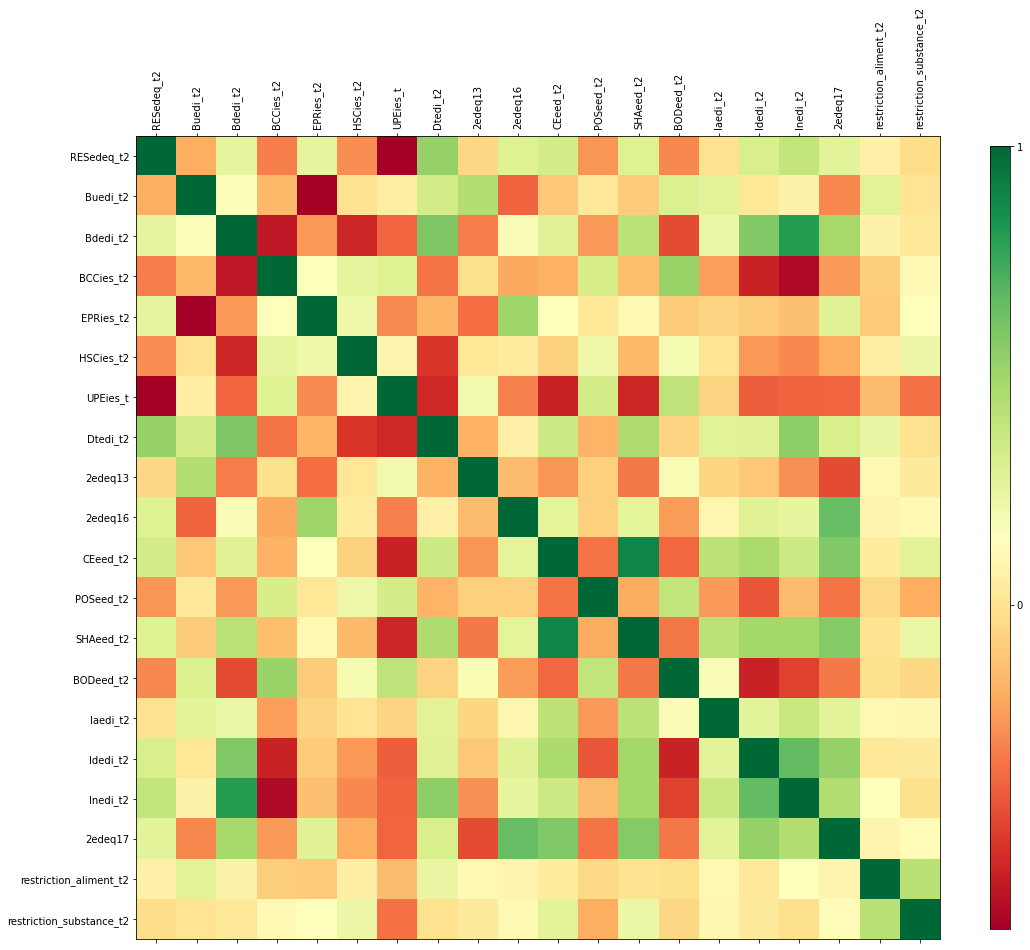

In [386]:
plot_corr(dfq0_mean, size=18)

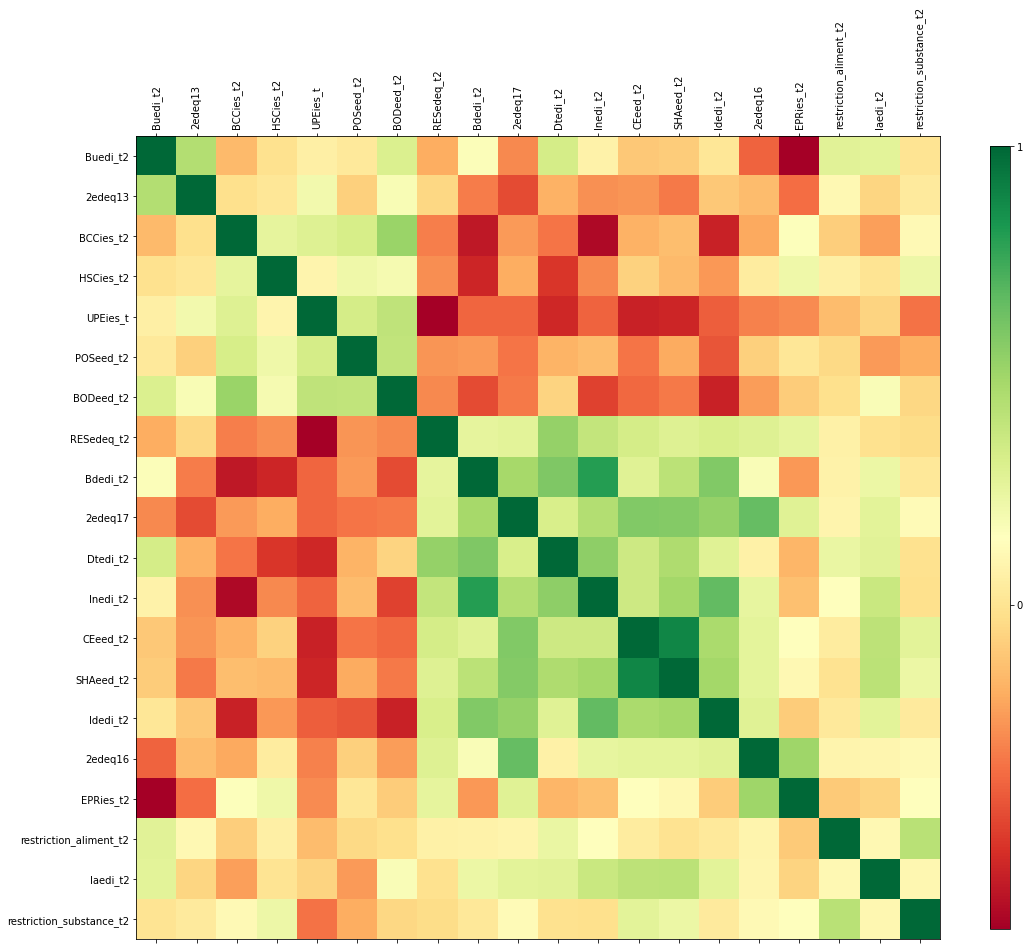

In [387]:

X = dfq0_mean.corr().values
d = sch.distance.pdist(X)   
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [dfq0_mean.columns.tolist()[i] for i in list((np.argsort(ind)))]
dfq0_mean = dfq0_mean.reindex(columns, axis='columns')

plot_corr(dfq0_mean, size=18)

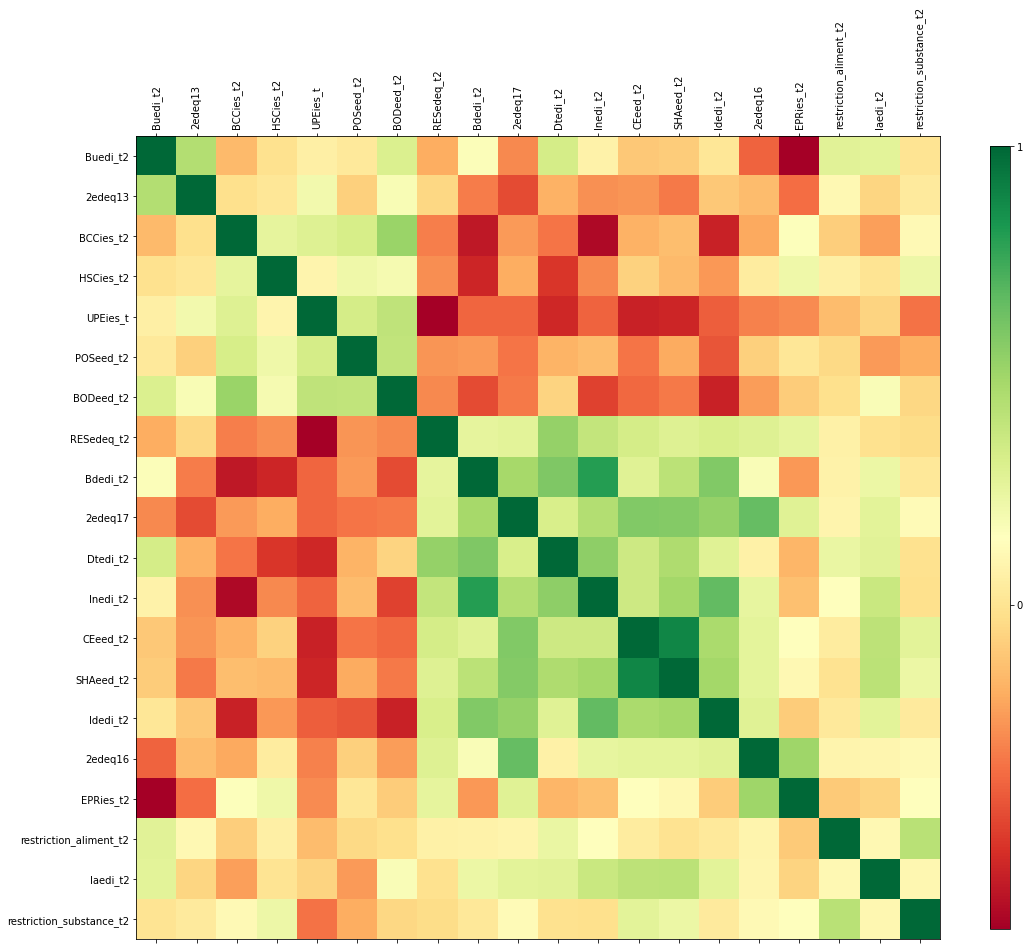

In [388]:
plot_corr(dfq0_mean, size=18)